### Global Warming, Temperature Change, Climate Change (TemperatureChange_ByCountry.csv):

The original datasets WorldTemperatureChange.csv (Environment_Temperature_change_E_All_Data_NOFLAG.csv on Kaggle) shows statistics of mean surface temperature change in every country around the world as well as regional and world data for it. The data is monthly updated from 1961 to 2019. Since the original data contains some unnessesary data, I created a code to first convert the csv file into chosen data only one. The variables are explained below. 


__Date(dt):__ Monthly data, starts in January 1961 to December 2019

__India:__ Average temperature change focusd in Idia

__Japan:__ Average temperature change focusd in Japan

__Netherlands:__ Average temperature change focusd in Netherlands

__World:__ Average temperature change focusd in World

__source:__ https://www.kaggle.com/datasets/sevgisarac/temperature-change

### Project Objectives
__Trend and Comparative Analysis__

Once collecting data, find the trends in temperature change over years in the world. Then, narrow it down into each country data and check if there are significant effects of one country to another. 

__Predictive Modeling__

Utilizing various predicting models to predict the future temperature change. This includes techniques, such as time series analysis, machine learning algorithms, and so on. 

__Model Evaluation and Validation__

After predicting the model with such tequniques, evaluate the quality of those tequniques by using appropriate matrics. 

__Discussion__

After the evaluation and validation, utilize those models and discuss the future climate change as well as provide recommendations for researchers based on the analysis result and predictions. 

### Research Questions
1. What are the trends in temperature change over time?
2. How do the temperature change in one country affects the others?
3. How can the future global warming be predicted based on historical data?

In [484]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from ipywidgets import interact, widgets
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

### Conversion Code

The code below is the conversion code from original datasets to one contains chosen data only. The format is also modified based on GlobalTemperatures.csv, which was provided in class as an example. 


When checking, please include GlobalTemperatures.csv from week6 and WorldTemperatureChange.csv into a folder named input_data.
The original file name for the WorldTemperatureChange.csv is Environment_Temperature_change_E_All_Data_NOFLAG.csv

In [485]:
# Load the CSV file
file_path = 'GlobalLandTemperaturesByCountry.csv'
df = pd.read_csv(file_path)

# Filter the rows where the 'Country' column is 'Japan'
df_japan = df[df['Country'] == 'Japan']

# Save the filtered DataFrame to a new CSV file
filtered_file_path = 'JapanLandTemperature.csv'
df_japan.to_csv(filtered_file_path, index=False)

In [486]:
# Read the CSV file 'TemperatureChange_ByCountry.csv' into a DataFrame.
# The 'parse_dates' parameter is used to convert the 'dt' column to datetime objects.
# The 'index_col' parameter sets the 'dt' column as the index of the DataFrame.
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)
# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

In [487]:
df

AverageTemperature  AverageTemperatureUncertainty Country
dt                                                                   
1841-01-01              -1.100                          2.228   Japan
1841-02-01              -0.079                          1.836   Japan
1841-03-01               2.680                          2.221   Japan
1841-04-01               8.400                          2.067   Japan
1841-05-01              13.796                          1.759   Japan
...                        ...                            ...     ...
2013-05-01              15.256                          0.235   Japan
2013-06-01              19.961                          0.380   Japan
2013-07-01              24.286                          0.369   Japan
2013-08-01              25.669                          0.303   Japan
2013-09-01                 NaN                            NaN   Japan

[2073 rows x 3 columns]

In [488]:
# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

In [489]:
df

AverageTemperature Country
dt                                    
1841-01-01              -1.100   Japan
1841-02-01              -0.079   Japan
1841-03-01               2.680   Japan
1841-04-01               8.400   Japan
1841-05-01              13.796   Japan
...                        ...     ...
2013-05-01              15.256   Japan
2013-06-01              19.961   Japan
2013-07-01              24.286   Japan
2013-08-01              25.669   Japan
2013-09-01                 NaN   Japan

[2073 rows x 2 columns]

In [490]:
# Display concise summary information about the DataFrame.
# This includes the index dtype and column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 1841-01-01 to 2013-09-01
Freq: MS
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  2072 non-null   float64
 1   Country             2073 non-null   object 
dtypes: float64(1), object(1)
memory usage: 48.6+ KB


In [491]:
# Generate a statistical summary of the numerical columns in the DataFrame
df.describe()

AverageTemperature
count         2072.000000
mean            11.951907
std              8.189121
min             -2.259000
25%              3.949750
50%             12.757500
75%             19.524000
max             26.642000

In [492]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

AverageTemperature    1
Country               0
dtype: int64

In [493]:
# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]
print("Number of rows where all columns are NaN:", len(all_nan_rows))
print(all_nan_rows)

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

# Retrieve the dimensions of the DataFrame (number of rows, number of columns)
print(df.shape)

Number of rows where all columns are NaN: 0
Empty DataFrame
Columns: [AverageTemperature, Country]
Index: []
(2073, 2)


In [494]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

AverageTemperature    0
Country               0
dtype: int64

In [495]:
df

AverageTemperature Country
dt                                    
1841-01-01              -1.100   Japan
1841-02-01              -0.079   Japan
1841-03-01               2.680   Japan
1841-04-01               8.400   Japan
1841-05-01              13.796   Japan
...                        ...     ...
2013-05-01              15.256   Japan
2013-06-01              19.961   Japan
2013-07-01              24.286   Japan
2013-08-01              25.669   Japan
2013-09-01              25.669   Japan

[2073 rows x 2 columns]

In [496]:
# Return the index label of the minimum value for each column in the DataFrame
df.idxmin()

AverageTemperature   1922-01-01
Country              1841-01-01
dtype: datetime64[ns]

In [497]:
# Return the index label of the maximum value for each column in the DataFrame
df.idxmax()

AverageTemperature   2010-08-01
Country              1841-01-01
dtype: datetime64[ns]

### World Temperature Change Over Time
__Purpose of the Plot__

the below graph is created to identify long-term temperature change patterns

__Interpretation of the Result__

The world temperature change has a clear upward trend. Especially after 200s, the temperature rise becomes more radically.

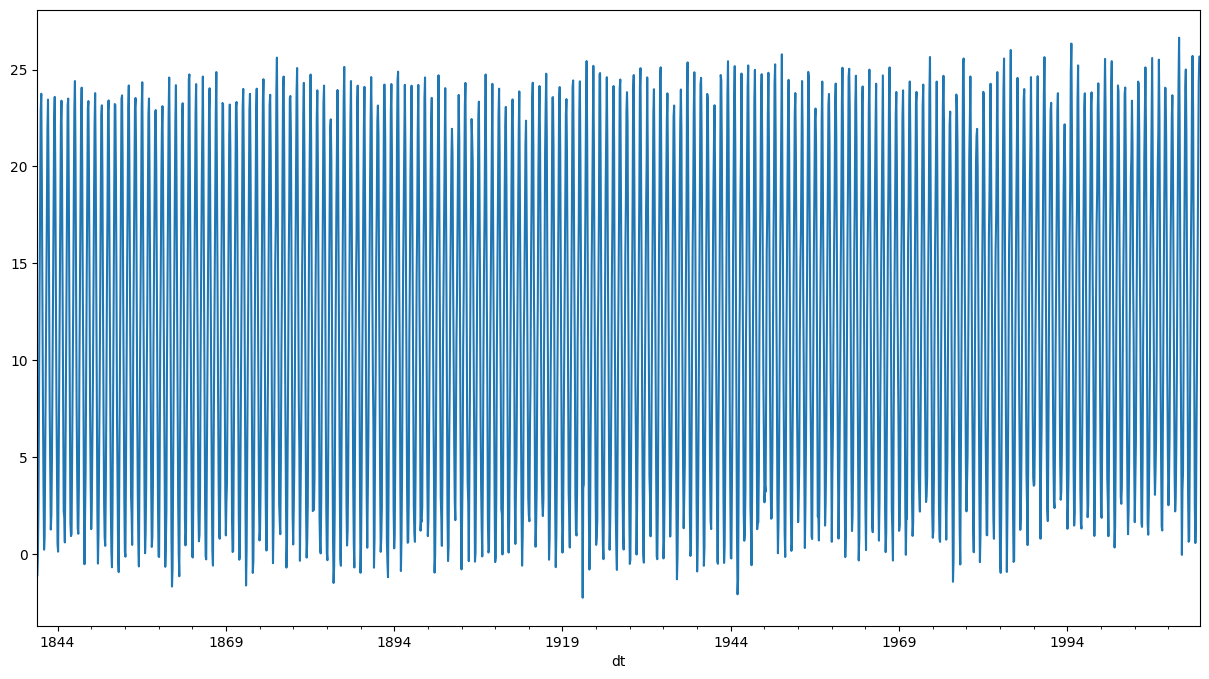

In [498]:
# Plot the 'World' column from the DataFrame
# Set the figure size to (15, 8) for better visualization
df.AverageTemperature.plot(figsize=(15, 8));

### Recent World Temperature Change
__Purpose of the Plot__

This plot focuses on the recent 200 months to highlight short-term temperature trends.

__Interpretation of the Result__

The recent data shows the gradual rise of the world temperature, reinforcing the ongoing trend of global warming.

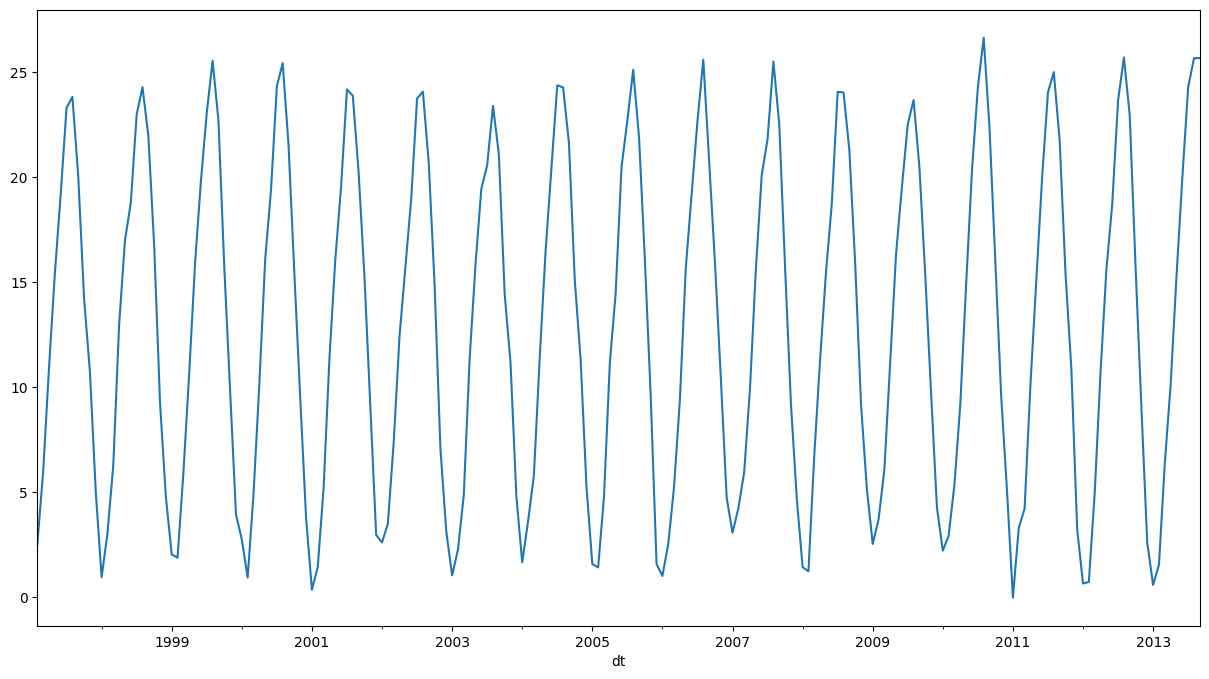

In [499]:
# Plot the 'LandAverageTemperature' column from the last 200 rows of the DataFrame
# Set the figure size to (15, 8) for better visualization
df.AverageTemperature[-200:].plot(figsize=(15, 8));

### World Temperature Change with 5-Year Moving Average
__Purpose of the Plot__

This plot uses a 5-year moving average to smooth out short-term variations and make longer-term temperature trends easier to recognize.

__Interpretation of the Result__

The smoothed data confirms the upward trend in global temperatures, making the long-term increase clearer.

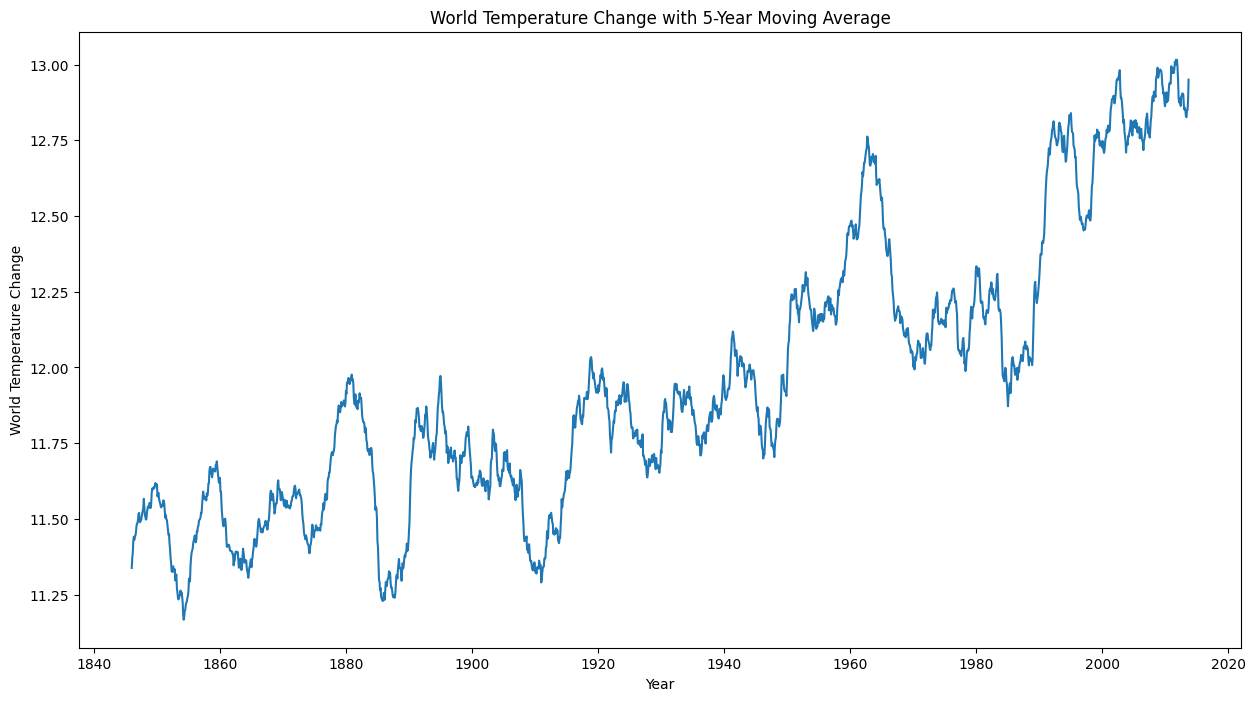

In [500]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Calculate the 5-year rolling mean
rolling_mean = df['AverageTemperature'].rolling(window=60).mean()

# Plot the 5-year moving average
plt.plot(rolling_mean.index, rolling_mean, label='5-Year Moving Average')

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('World Temperature Change')
plt.title('World Temperature Change with 5-Year Moving Average')

# Display the plot
plt.show()

In [501]:
# Print the index of the lowest value
print("Index of the lowest value:", rolling_mean.idxmin())

Index of the lowest value: 1854-03-01 00:00:00


### World Temperature Change with Expanding Average
__Purpose of the Plot__

This plot uses the expanding average to show the cumulative trend of temperature change over time.

__Interpretation of the Result__

The expanding average makes the sustained increase in temperatures more recognizable, emphasizing the long-term impact of global warming.

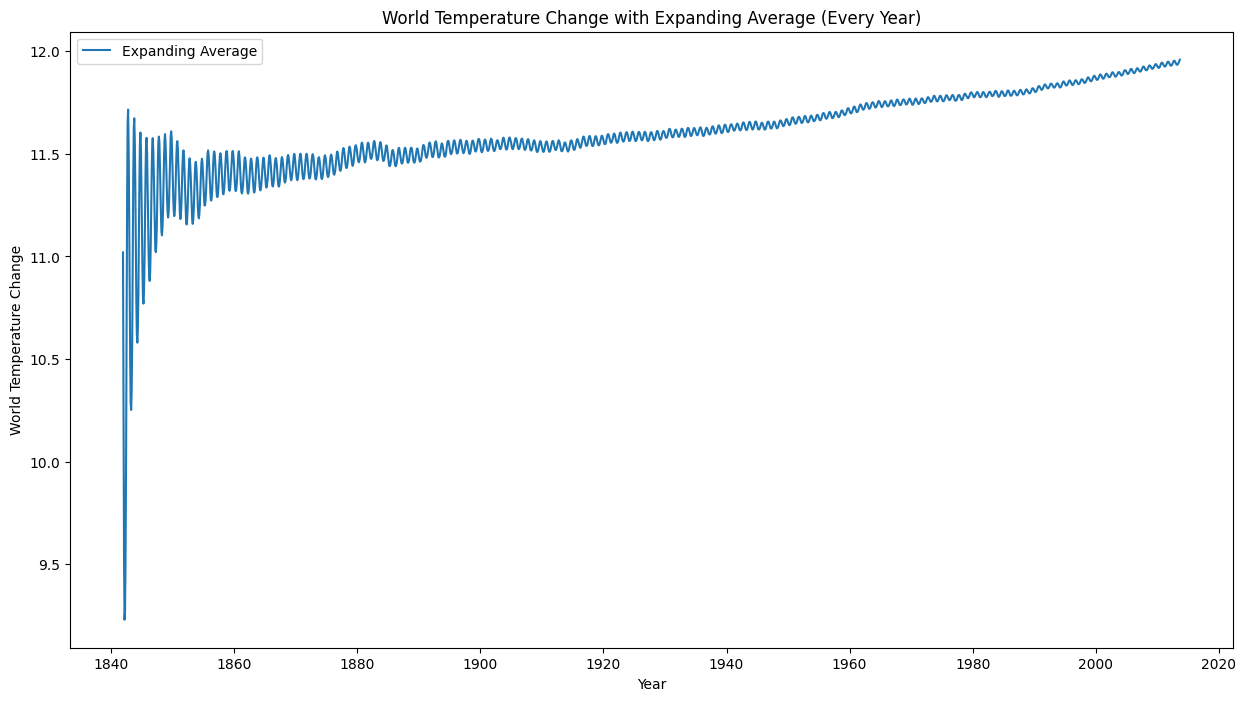

In [502]:
# Compute the expanding mean (cumulative mean) with a minimum number of observations equal to 12 months (1 year)
expanding_mean = df['AverageTemperature'].expanding(12).mean()

# Plot the expanding mean
plt.figure(figsize=(15, 8))
plt.plot(expanding_mean.index, expanding_mean, label='Expanding Average')
plt.xlabel('Year')
plt.ylabel('World Temperature Change')
plt.title('World Temperature Change with Expanding Average (Every Year)')
plt.legend()
plt.show()

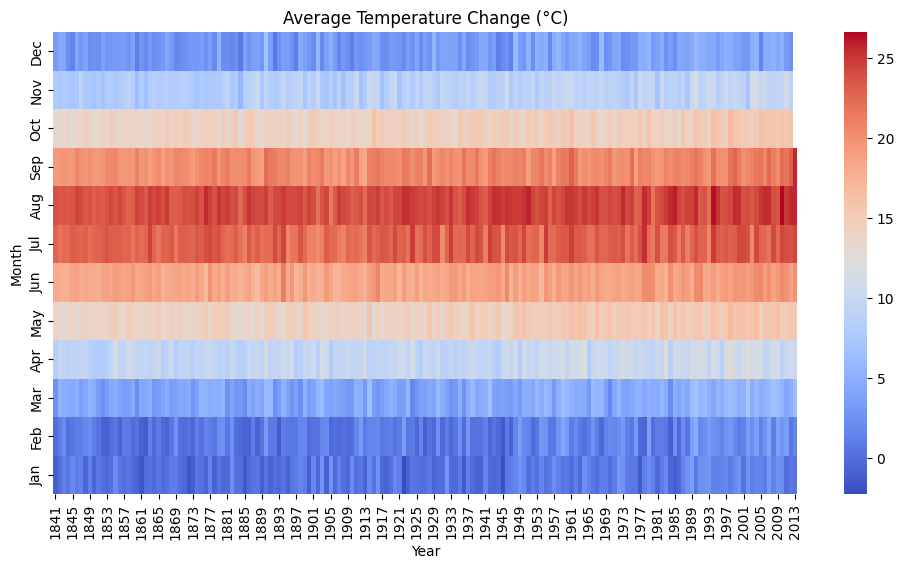

In [503]:
# Add 'Year' and 'Month' columns to the DataFrame
df['Year'] = df.index.year
df['Month'] = df.index.month

# Pivot the DataFrame to have years as columns and months as rows
pivot_df = df.pivot_table(index='Month', columns='Year', values='AverageTemperature')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df[::-1], cmap='coolwarm', annot=False, yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][::-1])
plt.title('Average Temperature Change (°C)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Drop the 'Year' and 'Month' columns from the DataFrame
df.drop('Year', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)

### Autocorrelation Plot

__Purpose__

the purpose is to visualize the autocorrelation of the world temperature change data over different lags. Autocorrelation measures the correlation of the time series with a lagged version of itself.

__Interpretation of the Result__

The autocorrelation plot shows significant autocorrelation for many lags, which indicates that previous values affect future values over a long period. This strong autocorrelation suggests that there are seasonality or long-term trends in the temperature change data.

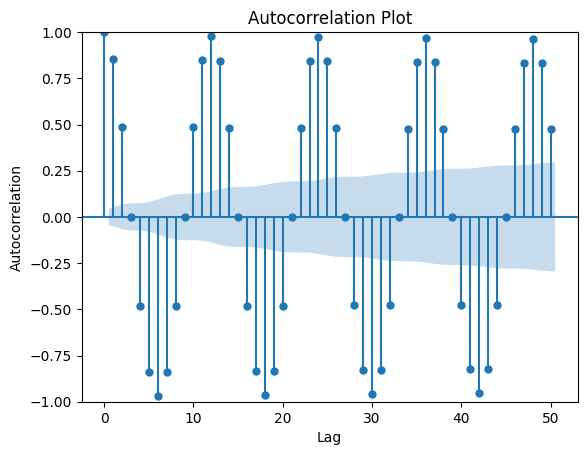

In [504]:
# Create autocorrelation plot
plot_acf(df.AverageTemperature, lags=50) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

### Classical Decomposition and Seasonal-Trend decomposition

__Purpose of the Plot__

These models decompose world temperature change data into trend, seasonal, and residual components using Classical Decomposition and Seasonal-Trend decomposition using Loess (STL).

__Interpretation of the Result__

_Classical Decomposition:_

Trend: Shows long-term upward trend
Seasonal: Shows a regular annual pattern.
Residual: Residuals are centered around zero, which indicate the model captures trend and seasonality well.

_STL Decomposition:_

Trend: Shows an upward trend.
Seasonal: Shows a more flexible pattern.
Residual: Residuals are more stable, suggesting STL better captures data patterns.

_Overall:_

Both methods confirm the upward temperature trend and significant seasonality, with STL providing more detailed seasonal patterns and stable residuals.

In [505]:
# Perform classical decomposition of the 'LandAverageTemperature' column
classical_decomposition = seasonal_decompose(df.AverageTemperature, model='additive', period=12)

# Extract components: trend, seasonal, and residual
classical_trend = classical_decomposition.trend
classical_seasonal = classical_decomposition.seasonal
classical_residual = classical_decomposition.resid

In [506]:
# Perform Seasonal-Trend decomposition using Loess (STL) on the 'LandAverageTemperature' column
stl = STL(df.AverageTemperature)

# Fit the STL decomposition model
stl_result = stl.fit()

# Extract components: trend, seasonal, and residual
stl_trend = stl_result.trend
stl_seasonal = stl_result.seasonal
stl_residual = stl_result.resid

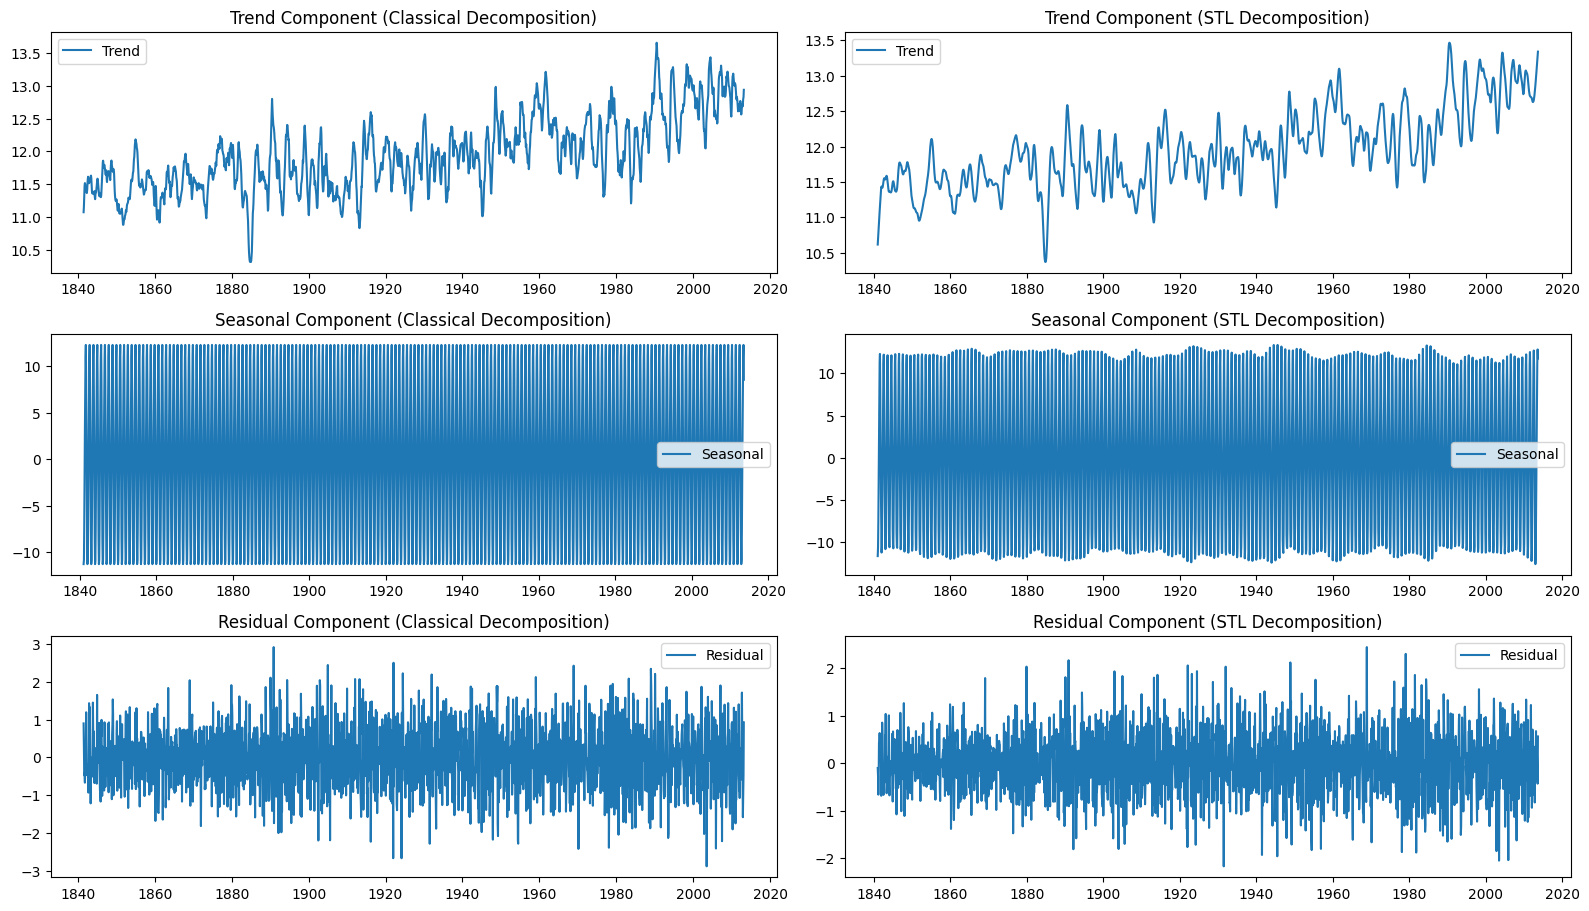

In [507]:
# Plotting
plt.figure(figsize=(16, 12))

# Classical Decomposition Components
plt.subplot(4, 2, 1)
plt.plot(df.index, classical_trend, label='Trend')
plt.title('Trend Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(df.index, classical_seasonal, label='Seasonal')
plt.title('Seasonal Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(df.index, classical_residual, label='Residual')
plt.title('Residual Component (Classical Decomposition)')
plt.legend()

# STL Decomposition Components
plt.subplot(4, 2, 2)
plt.plot(df.index, stl_trend, label='Trend')
plt.title('Trend Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(df.index, stl_seasonal, label='Seasonal')
plt.title('Seasonal Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(df.index, stl_residual, label='Residual')
plt.title('Residual Component (STL Decomposition)')
plt.legend()

plt.tight_layout()
plt.show()

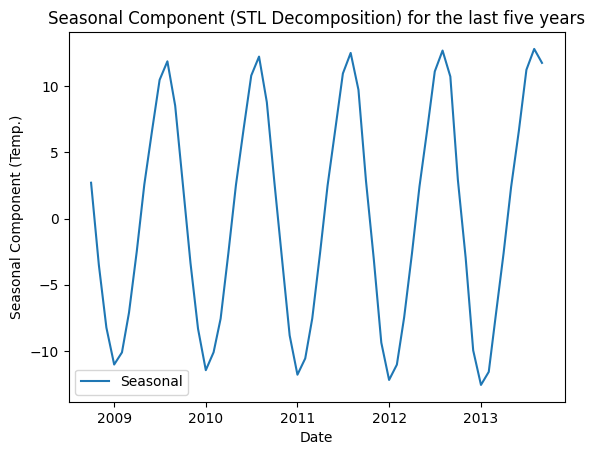

In [508]:
# Plot the seasonal component (STL Decomposition) for the last five years
plt.plot(df.index[-60:], stl_seasonal[-60:], label='Seasonal')
plt.title('Seasonal Component (STL Decomposition) for the last five years')
plt.xlabel('Date')
plt.ylabel('Seasonal Component (Temp.)')
plt.legend()
plt.show()

### ADF Test

__Purpose__

This method below checks the stationarity of data by performing ADF test

__Result__

The initial data is not stationary because it has the p-value more than 0.05 for ADF test.

In [509]:
def check_stationarity_adf(data):
    # Perform ADF test
    adf_result = adfuller(data)
    adf_statistic = adf_result[0]
    adf_p_value = adf_result[1]

    # Print results
    print("ADF Test:")
    print("ADF Statistic:", adf_statistic)
    print("p-value:", adf_p_value)
    if adf_p_value < 0.05:
        print("ADF Test Result: Data is stationary\n")
    else:
        print("ADF Test Result: Data is non-stationary\n")

In [510]:
check_stationarity_adf(df.AverageTemperature)

ADF Test:
ADF Statistic: -3.7161689919028125
p-value: 0.0038913862678343573
ADF Test Result: Data is stationary



### KPSS Test

__Purpose__
This method below checks the stationarity of data by performing KPSS test

__Result__
The initial data is not stationary because it has the p-value less than 0.05 for KPSS test.

In [511]:
from statsmodels.tsa.stattools import kpss

def check_stationarity_kpss(data):
    # Perform KPSS test
    kpss_result = kpss(data, regression='c', nlags="auto")
    kpss_statistic = kpss_result[0]
    kpss_p_value = kpss_result[1]
    kpss_critical_values = kpss_result[3]

    # Print results
    print("KPSS Test:")
    print("KPSS Statistic:", kpss_statistic)
    print("p-value:", kpss_p_value)
    print("Critical Values:")
    for key, value in kpss_critical_values.items():
        print(f"   {key} : {value}")

    if kpss_p_value < 0.05:
        print("KPSS Test Result: Data is non-stationary\n")
    else:
        print("KPSS Test Result: Data is stationary\n")

# Example usage:
# check_stationarity_kpss(your_data_series)


In [512]:
check_stationarity_kpss(df.AverageTemperature)

KPSS Test:
KPSS Statistic: 2.844941569083018
p-value: 0.01
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test Result: Data is non-stationary



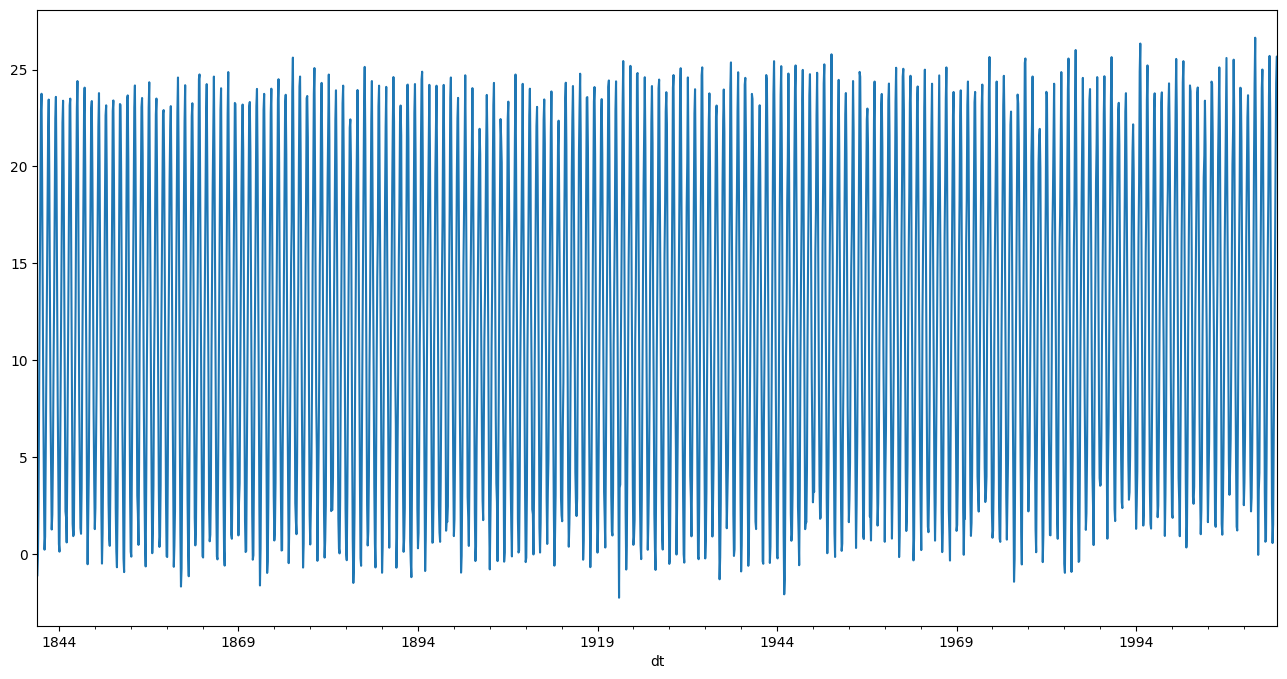

In [513]:
df.AverageTemperature.plot(figsize=(16, 8));

### Differencing

__Purpose__

The purpose of differencing is to make the data stationary and enable the prediction implementation. 

__Result__

After the differencing, the data becomes stationary, so it is successful.

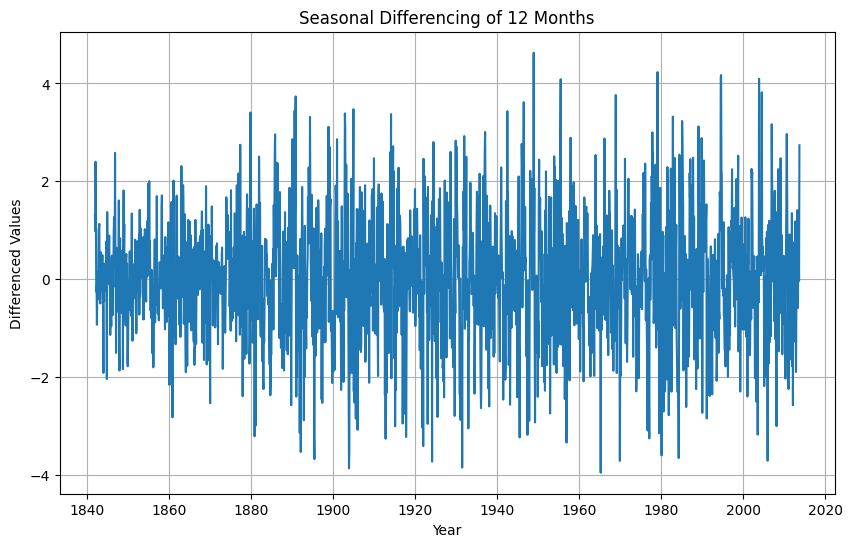

In [514]:
# Compute seasonal differencing of 12 months for the 'LandAverageTemperature' column
seasonal_diff = df.AverageTemperature.diff(12)

# Plot the differenced column
plt.figure(figsize=(10, 6))
plt.plot(seasonal_diff)
plt.title('Seasonal Differencing of 12 Months')
plt.xlabel('Year')
plt.ylabel('Differenced Values')
plt.grid(True)
plt.show()

In [515]:
check_stationarity_adf(seasonal_diff.dropna())

ADF Test:
ADF Statistic: -13.055062943706156
p-value: 2.103190060027954e-24
ADF Test Result: Data is stationary



In [516]:
check_stationarity_kpss(seasonal_diff.dropna())

KPSS Test:
KPSS Statistic: 0.0055291600673896225
p-value: 0.1
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test Result: Data is stationary



In [517]:
# Compute the absolute minimum value of the seasonal differenced data
add_value = round(abs(seasonal_diff.min()))

# Print the value to be subtracted after developing the model
print(f"This value has to be subtracted after developing our model = {add_value}")

# Add the absolute minimum value to the seasonal differenced data
seasonal_diff += add_value

This value has to be subtracted after developing our model = 4


In [518]:
class TSMean:
    def __init__(self, series):
        """
        Initialize TSMean with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Calculate the mean of the series
        self.mean = series.mean()

    def forecast(self, steps):
        """
        Generate forecasts using the mean value.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Return a list containing the mean value repeated for the specified number of steps
        return [self.mean] * steps
    
class TSNaive:
    def __init__(self, series):
        """
        Initialize TSNaive with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Store the last observed value of the series
        self.last_value = series.iloc[-1]

    def fit(self):
        """
        Fit the model (no action needed for naive method).

        Returns:
        self: Returns self.
        """
        return self

    def forecast(self, steps):
        """
        Generate forecasts using the last observed value.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Return a list containing the last observed value repeated for the specified number of steps
        return [self.last_value] * steps
    
class TSNaiveSeasonal:
    def __init__(self, series, period):
        """
        Initialize TSNaiveSeasonal with the given time series and seasonal period.

        Parameters:
        series (pandas Series): Time series data.
        period (int): Seasonal period of the time series.
        """
        # Store the seasonal period and values of the series
        self.period = period
        self.values = series.values

    def forecast(self, steps):
        """
        Generate seasonal naive forecasts.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Generate forecasts by repeating the last observed value from the corresponding season
        seasonal_forecast = []
        for i in range(steps):
            index = len(self.values) - (i % self.period) - 1
            seasonal_forecast.append(self.values[index])
        return seasonal_forecast[::-1]
    
class TSDrift:
    def __init__(self, series):
        """
        Initialize TSDrift with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Calculate the linear regression parameters
        self.x_start = 0
        self.x_end = len(series) - 1
        self.y_start = series.iloc[0]
        self.y_end = series.iloc[-1]
        self.slope = (self.y_end - self.y_start) / (self.x_end - self.x_start)
        self.intercept = self.y_start - self.slope * self.x_start

    def forecast(self, steps):
        """
        Generate forecasts using the linear regression (drift) method.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Generate forecasts by extending the linear regression line into the future
        forecast_values = [self.intercept + self.slope * (self.x_end + i) for i in range(1, steps + 1)]
        return forecast_values

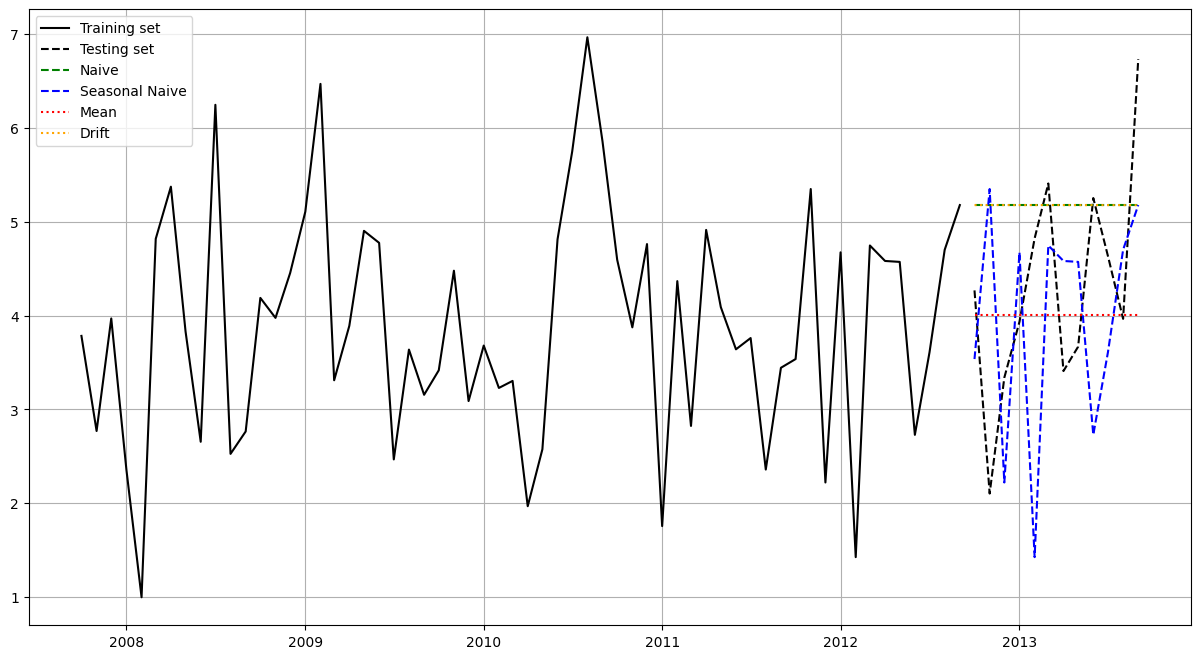

In [519]:
Train = seasonal_diff.dropna()[:-12]
Test = seasonal_diff.dropna()[-12:]

forecast_mean = np.array([Train.mean()] * 12)

forecast_naive = np.array([Train.iloc[-1]] * 12)

forecast_seasonal = Train[-12:].values

last_value = Train.iloc[-1]
slope = (last_value - Train.iloc[0]) / (len(Train) - 1)
forecast_drift = np.array([last_value + slope * i for i in range(1, 13)])

test_index = Test.index.to_numpy()

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(Train[-60:], 'k', label='Training set')
ax.plot(Test, 'k', linestyle='--', label='Testing set')
ax.plot(test_index, forecast_naive, color='green', label='Naive', linestyle='--')
ax.plot(test_index, forecast_seasonal, color='blue', label='Seasonal Naive', linestyle='--')
ax.plot(test_index, forecast_mean, color='red', label='Mean', linestyle='dotted')
ax.plot(test_index, forecast_drift, color='orange', label='Drift', linestyle=':')
ax.legend(loc='upper left')
ax.grid()
plt.show()

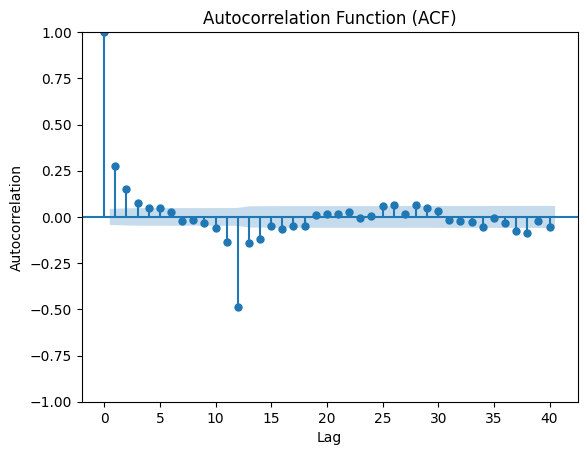

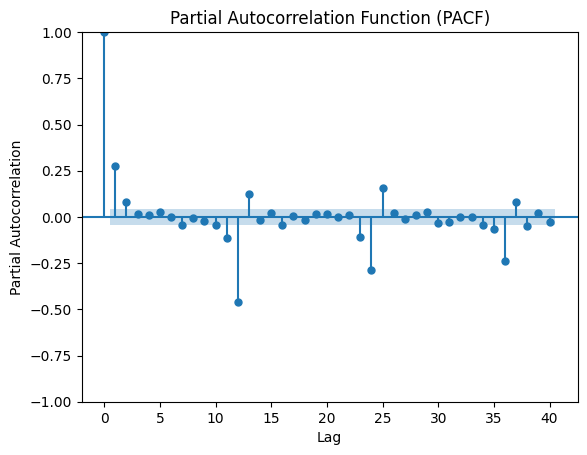

In [520]:
# Plot ACF
plot_acf(Train, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(Train, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [521]:
# Print information about the data
print('Observations: {}'.format(len(seasonal_diff)))
print('Training Observations: {}'.format(len(Train)))
print('Testing Observations: {}'.format(len(Test)))

Observations: 2073
Training Observations: 2049
Testing Observations: 12


In [522]:
# Calculate RMSE, MAE, MAPE for each model
def calculate_metrics(true_values, forecasted_values):
    rmse = np.sqrt(mean_squared_error(true_values, forecasted_values))
    mae = mean_absolute_error(true_values, forecasted_values)
    mape = np.mean(np.abs((true_values - forecasted_values) / true_values)) * 100
    return [rmse, mae, mape]

In [523]:
naive_metrics = calculate_metrics(Test, forecast_naive)
seasonal_metrics = calculate_metrics(Test, forecast_seasonal)
mean_metrics = calculate_metrics(Test, forecast_mean)
drift_metrics = calculate_metrics(Test, forecast_drift)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Naive', 'Seasonal Naive', 'Mean', 'Drift'],
    'RMSE': [naive_metrics[0], seasonal_metrics[0], mean_metrics[0], drift_metrics[0]],
    'MAE': [naive_metrics[1], seasonal_metrics[1], mean_metrics[1], drift_metrics[1]],
    'MAPE (%)': [naive_metrics[2], seasonal_metrics[2], mean_metrics[2], drift_metrics[2]]
})
results.set_index('Model', inplace=True)
results

RMSE       MAE   MAPE (%)
Model                                        
Naive           1.443725  1.193667  35.487985
Seasonal Naive  1.766686  1.484833  39.786419
Mean            1.177103  0.892167  22.263544
Drift           1.443558  1.193528  35.482959

### Autoregression Model

__Purpose of the Result__


__Interpretation of the Result__


In [524]:
# Train autoregression model
model = AutoReg(Train, lags=25)  # Create an autoregression model with 25 lags
model_fit = model.fit()  # Fit the autoregression model to the training data
print('Coefficients: %s' % model_fit.params)  # Print the coefficients of the fitted model

Coefficients: const                     4.869810
AverageTemperature.L1     0.266895
AverageTemperature.L2     0.072010
AverageTemperature.L3     0.022034
AverageTemperature.L4    -0.013705
AverageTemperature.L5     0.021662
AverageTemperature.L6     0.009128
AverageTemperature.L7    -0.018963
AverageTemperature.L8    -0.002023
AverageTemperature.L9     0.018241
AverageTemperature.L10    0.022183
AverageTemperature.L11   -0.022477
AverageTemperature.L12   -0.649679
AverageTemperature.L13    0.213745
AverageTemperature.L14   -0.005363
AverageTemperature.L15    0.034227
AverageTemperature.L16   -0.046716
AverageTemperature.L17    0.006144
AverageTemperature.L18   -0.013113
AverageTemperature.L19    0.014745
AverageTemperature.L20    0.007880
AverageTemperature.L21    0.016292
AverageTemperature.L22    0.048143
AverageTemperature.L23   -0.046654
AverageTemperature.L24   -0.328993
AverageTemperature.L25    0.159366
dtype: float64


In [525]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                 2049
Model:                    AutoReg(25)   Log Likelihood               -2836.991
Method:               Conditional MLE   S.D. of innovations              0.983
Date:                Sat, 13 Jul 2024   AIC                           5727.983
Time:                        22:52:01   BIC                           5879.529
Sample:                    02-01-1844   HQIC                          5783.594
                         - 09-01-2012                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.8698      0.372     13.081      0.000       4.140       5.599
AverageTemperature.L1      0.2669      0.022     12.156      0.000       0.224       0.310
AverageTemperature.L2      0.0720      0.022      3.343      0.001       0.030       0.114
AverageTemperature.L3      0.0220      0.022      1.021      0.307      -0.020       0.064
AverageTemperature.L4     -0.0137      0.022     -0.636      0.525      -0.056       0.029
AverageTemperature.L5      0.0217      0.022      1.004      0.315      -0.021       0.064
AverageTemperature.L6      0.0091      0.022      0.423      0.672      -0.033       0.051
AverageTemperature.L7     -0.0190      0.022     -0.879      0.379      -0.061       0.023
AverageTemperature.L8     -0.0020      0.022     -0.094      0.925      -0.044       0.040
AverageTemperature.L9      0.0182      0.022      0.844      0.398      -0.024       0.061
AverageTemperature.L10     0.0222      0.022      1.027      0.304      -0.020       0.065
AverageTemperature.L11    -0.0225      0.022     -1.041      0.298      -0.065       0.020
AverageTemperature.L12    -0.6497      0.022    -30.080      0.000      -0.692      -0.607
AverageTemperature.L13     0.2137      0.026      8.366      0.000       0.164       0.264
AverageTemperature.L14    -0.0054      0.022     -0.248      0.804      -0.048       0.037
AverageTemperature.L15     0.0342      0.022      1.583      0.113      -0.008       0.077
AverageTemperature.L16    -0.0467      0.022     -2.160      0.031      -0.089      -0.004
AverageTemperature.L17     0.0061      0.022      0.284      0.777      -0.036       0.049
AverageTemperature.L18    -0.0131      0.022     -0.605      0.545      -0.056       0.029
AverageTemperature.L19     0.0147      0.022      0.681      0.496      -0.028       0.057
AverageTemperature.L20     0.0079      0.022      0.364      0.716      -0.035       0.050
AverageTemperature.L21     0.0163      0.022      0.752      0.452      -0.026       0.059
AverageTemperature.L22     0.0481      0.022      2.222      0.026       0.006       0.091
AverageTemperature.L23    -0.0467      0.022     -2.153      0.031      -0.089      -0.004
AverageTemperature.L24    -0.3290      0.022    -15.202      0.000      -0.371      -0.287
AverageTemperature.L25     0.1594      0.022      7.234      0.000       0.116       0.203
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0226           -0.1930j            1.0407           -0.4703
AR.2            -1.0226           +0.1930j            1.0407            0.4703
AR.3            -0.9945           -0.3441j            1.0523           -0.4470
AR.4            -0.9945           +0.3441j       

predicted=4.614516, expected=4.269000
predicted=3.233927, expected=2.103000
predicted=5.123795, expected=3.339000
predicted=4.345236, expected=3.935000
predicted=5.734094, expected=4.824000
predicted=3.736637, expected=5.409000
predicted=3.354529, expected=3.409000
predicted=3.571183, expected=3.669000
predicted=5.086638, expected=5.254000
predicted=4.287957, expected=4.635000
predicted=4.160301, expected=3.966000
predicted=3.298949, expected=6.736000


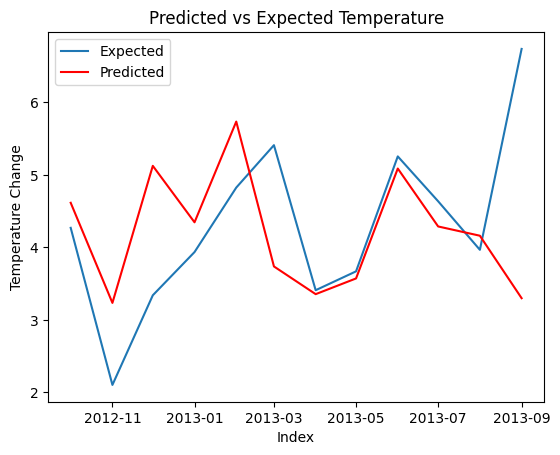

In [526]:
# Make predictions using the fitted model
predictions = model_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature Change')
plt.title('Predicted vs Expected Temperature')
plt.legend();

In [527]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Autoregression'] = metrics_df.values[0]

In [528]:
results

RMSE       MAE   MAPE (%)
Model                                        
Naive           1.443725  1.193667  35.487985
Seasonal Naive  1.766686  1.484833  39.786419
Mean            1.177103  0.892167  22.263544
Drift           1.443558  1.193528  35.482959
Autoregression  1.303498  0.879331  20.532824

In [529]:
# calculate residuals
# Predict values for the training set using the fitted autoregression model
# Start predicting from the 26th observation (lags = 25) to the end of the training set
predictions_train = model_fit.predict(start=25, end=len(Train), dynamic=False).values

# Extract the actual values of the training set starting from the 26th observation
Train_mod = Train[25:].values

# Calculate residuals by subtracting predicted values from actual values for each corresponding observation
train_resid = [Train_mod[i] - predictions_train[i] for i in range(len(Train_mod))]

In [530]:
model_ma = AutoReg(train_resid, lags=200) 
model_fit_ma = model_ma.fit()
print('Coefficients: %s' % model_fit_ma.params)

Coefficients: [ 4.58240216e-03  2.08469787e-02 -4.85236185e-03  2.21892122e-02
 -4.94866623e-03  2.31441778e-02 -4.88435620e-02  1.02854964e-02
 -5.36937770e-03  3.57021374e-02 -1.54395572e-02  1.81627861e-02
 -3.00963349e-01  2.17879133e-02  2.07320897e-03  3.36178942e-02
 -8.19414221e-03  2.89595548e-02 -4.08712042e-02  2.73619092e-02
 -1.86720305e-02  3.44948015e-02 -2.23343288e-02  3.12487656e-02
 -3.85810802e-01  2.89038236e-02  5.93936143e-03  1.91552701e-02
 -8.75014602e-04  5.61159079e-02 -5.29706148e-02  1.06765862e-03
 -1.05093451e-02  5.27743391e-02 -1.67572486e-02  3.80387923e-02
 -5.07524411e-01  2.73454118e-02 -5.20860247e-02  5.00375738e-02
  1.11359822e-02  1.45813674e-02 -3.86919790e-02  4.16718424e-02
 -7.97734741e-03  6.35964986e-02  9.53805551e-03  4.20793800e-02
 -3.19101071e-01  6.21601680e-03  3.68532056e-02  2.99475911e-02
  4.37770787e-02  4.76138528e-02 -7.32026018e-02  1.34291749e-03
  2.08517352e-02  4.50673673e-02 -1.08170854e-02  5.72328381e-02
 -3.2519750

In [531]:
model_fit_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 2024
Model:                   AutoReg(200)   Log Likelihood               -2280.448
Method:               Conditional MLE   S.D. of innovations              0.845
Date:                Sat, 13 Jul 2024   AIC                           4964.896
Time:                        22:52:01   BIC                           6077.671
Sample:                           200   HQIC                          5375.390
                                 2024                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.020      0.231      0.817      -0.034       0.043
y.L1           0.0208      0.023      0.890      0.374      -0.025       0.067
y.L2          -0.0049      0.023     -0.207      0.836      -0.051       0.041
y.L3           0.0222      0.023      0.947      0.343      -0.024       0.068
y.L4          -0.0049      0.023     -0.211      0.833      -0.051       0.041
y.L5           0.0231      0.023      0.988      0.323      -0.023       0.069
y.L6          -0.0488      0.023     -2.087      0.037      -0.095      -0.003
y.L7           0.0103      0.023      0.440      0.660      -0.036       0.056
y.L8          -0.0054      0.023     -0.230      0.818      -0.051       0.040
y.L9           0.0357      0.023      1.530      0.126      -0.010       0.081
y.L10         -0.0154      0.023     -0.661      0.509      -0.061       0.030
y.L11          0.0182      0.023      0.777      0.437      -0.028       0.064
y.L12         -0.3010      0.023    -12.878      0.000      -0.347      -0.255
y.L13          0.0218      0.024      0.893      0.372      -0.026       0.070
y.L14          0.0021      0.024      0.085      0.932      -0.046       0.050
y.L15          0.0336      0.024      1.378      0.168      -0.014       0.081
y.L16         -0.0082      0.024     -0.336      0.737      -0.056       0.040
y.L17          0.0290      0.024      1.187      0.235      -0.019       0.077
y.L18         -0.0409      0.024     -1.676      0.094      -0.089       0.007
y.L19          0.0274      0.024      1.121      0.262      -0.020       0.075
y.L20         -0.0187      0.024     -0.765      0.444      -0.067       0.029
y.L21          0.0345      0.024      1.414      0.157      -0.013       0.082
y.L22         -0.0223      0.024     -0.915      0.360      -0.070       0.025
y.L23          0.0312      0.024      1.281      0.200      -0.017       0.079
y.L24         -0.3858      0.024    -15.820      0.000      -0.434      -0.338
y.L25          0.0289      0.026      1.111      0.267      -0.022       0.080
y.L26          0.0059      0.026      0.228      0.820      -0.045       0.057
y.L27          0.0192      0.026      0.736      0.462      -0.032       0.070
y.L28         -0.0009      0.026     -0.034      0.973      -0.052       0.050
y.L29          0.0561      0.026      2.154      0.031       0.005       0.107
y.L30         -0.0530      0.026     -2.036      0.042      -0.104      -0.002
y.L31          0.0011      0.026      0.041      0.967      -0.050       0.052
y.L32         -0.0105      0.026     -0.404      0.686      -0.061       0.040
y.L33          0.0528      0.026      2.039      0.041       0.002       0.103
y.L34         -0.0168      0.026     -0.647      0.518      -0.068       0.034
y.L35          0.0380      0.026      1.468      0.142      -0.013       0.089
y.L36         -0.5075      0.026    -19.583      0.000      -0.558      -0.457
y.L37          0.0273      0.029      0.959      0.337      -0.029       0.083
y.

predicted=-0.110575, expected=-0.345516
predicted=-0.585646, expected=-1.130927
predicted=-0.122728, expected=-1.784795
predicted=0.713780, expected=-0.410236
predicted=-0.071440, expected=-0.910094
predicted=0.670226, expected=1.672363
predicted=1.071092, expected=0.054471
predicted=-0.134632, expected=0.097817
predicted=-0.756883, expected=0.167362
predicted=-0.166637, expected=0.347043
predicted=-0.816914, expected=-0.194301
predicted=-0.672811, expected=3.437051


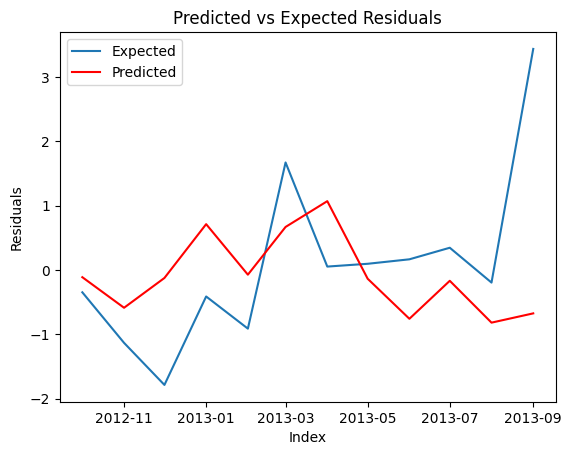

In [532]:
# Make predictions using the fitted model
predictions_ma = model_fit_ma.predict(start=len(train_resid), end=len(train_resid)+len(Test)-1, dynamic=False)

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], Test.iloc[i]-predictions[i]))

# Calculate and print Root Mean Squared Error (RMSE) for the predictions
# rmse = sqrt(mean_squared_error(test.values, predictions_ma))
# print('Test RMSE: %.3f' % rmse)

# Plot predictions vs expected
plt.plot(Test.index, Test - predictions, label='Expected')
plt.plot(Test.index, predictions_ma, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Predicted vs Expected Residuals')
plt.legend();

In [533]:
predictions_sum = [x + y for x, y in zip(predictions, predictions_ma)]
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions_sum)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['AR+MA'] = metrics_df.values[0]

In [534]:
results

RMSE       MAE   MAPE (%)
Model                                        
Naive           1.443725  1.193667  35.487985
Seasonal Naive  1.766686  1.484833  39.786419
Mean            1.177103  0.892167  22.263544
Drift           1.443558  1.193528  35.482959
Autoregression  1.303498  0.879331  20.532824
AR+MA           1.459746  1.068881  23.935799

### Predicted vs. Expected Temperature Using ARIMA

__Purpose of the Result__
This plot compares predicted temperatures using the ARIMA model with the actual observed temperatures.

__Interpretation of the Result__
The plot shows that the ARIMA model cannot accurately predict temperature trends, the prediction values are way below the actual values. The reasom behind this is that the original temperature change data might had trends and seasonality that ARIMA cannot appropriately remove through differencing. 

In [535]:
# Automatically search for the best ARIMA model parameters using auto_arima function
seed = 42
auto_arima_model = auto_arima(Train, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=1,
                              seasonal=False,
                              d=None, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True,
                              random_state=seed)

# Print the best parameters found by auto_arima
print("Best parameters found by auto_arima:", auto_arima_model.order)

# Create an ARIMA model with the best parameters obtained from auto_arima
model_arima = ARIMA(Train, order=auto_arima_model.order)

# Fit the ARIMA model to the training data
arima_fit = model_arima.fit()

# Akaike Information Criterion (AIC) is a metric used to evaluate the goodness of fit of a statistical model while penalizing for the number of parameters in the model. 
# The lower the AIC value, the better the model is considered to be.
# "intercept" refers to an additional parameter in the model equation that represents a constant term or a baseline level. Including an intercept term allows the model to capture any systematic offset or bias in the data that is not explained by the autoregressive (AR), differencing (I), and moving average (MA) components.

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6791.158, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11699.263, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7438.705, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10013.412, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9135.726, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7091.788, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6571.200, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6613.801, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6584.398, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6573.200, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6573.200, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6744

### The Akaike Information Criterion (AIC):
is a measure of the relative quality of statistical models for a given set of data. It was developed by the Japanese statistician Hirotugu Akaike in 1973.

__Purpose:__
The primary purpose of the AIC is to balance the goodness of fit of a model with its simplicity or complexity. It provides a way to compare different models fitted to the same dataset, considering both the goodness of fit and the number of parameters used in the model.

__Calculation:__
The AIC is calculated using the formula:

$$
AIC = −2×ln(𝐿) + 2×𝑘
$$

Where:
- 𝐿: is the likelihood of the model given the data.
- 𝑘: is the number of parameters in the model.

__Interpretation:__
- Lower AIC values: Models with lower AIC values are considered to have better balance between goodness of fit and simplicity. They are preferred over models with higher AIC values.
- Higher AIC values: Models with higher AIC values are considered to be less parsimonious or overly complex, and they may overfit the data.

__Usage:__
- The AIC is commonly used for model selection, especially in cases where multiple models are fitted to the same dataset. The model with the lowest AIC value is usually selected as the preferred model.
- AIC can be used to compare different models fitted to the same dataset, allowing researchers to choose the most appropriate model based on both fit and complexity.

In [536]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                 2049
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3281.600
Date:                Sat, 13 Jul 2024   AIC                           6571.200
Time:                        22:52:06   BIC                           6593.700
Sample:                    01-01-1842   HQIC                          6579.451
                         - 09-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0110      0.041     96.848      0.000       3.930       4.092
ar.L1          0.5504      0.059      9.390      0.000       0.436       0.665
ma.L1         -0.2991      0.067     -4.484      0.000      -0.430      -0.168
sigma2         1.4408      0.041     35.254      0.000       1.361       1.521
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                17.08
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

predicted=4.340231, expected=4.269000
predicted=4.192216, expected=2.103000
predicted=4.110751, expected=3.339000
predicted=4.065915, expected=3.935000
predicted=4.041237, expected=4.824000
predicted=4.027655, expected=5.409000
predicted=4.020180, expected=3.409000
predicted=4.016066, expected=3.669000
predicted=4.013801, expected=5.254000
predicted=4.012555, expected=4.635000
predicted=4.011869, expected=3.966000
predicted=4.011492, expected=6.736000


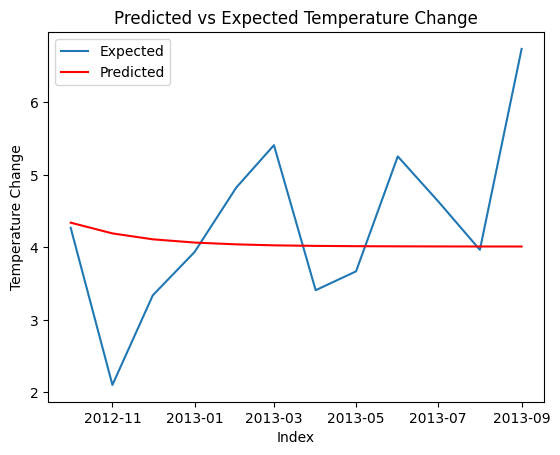

In [537]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature Change')
plt.title('Predicted vs Expected Temperature Change')
plt.legend();

In [538]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['ARIMA'] = metrics_df.values[0]

In [539]:
results

RMSE       MAE   MAPE (%)
Model                                        
Naive           1.443725  1.193667  35.487985
Seasonal Naive  1.766686  1.484833  39.786419
Mean            1.177103  0.892167  22.263544
Drift           1.443558  1.193528  35.482959
Autoregression  1.303498  0.879331  20.532824
AR+MA           1.459746  1.068881  23.935799
ARIMA           1.202360  0.901541  22.936924

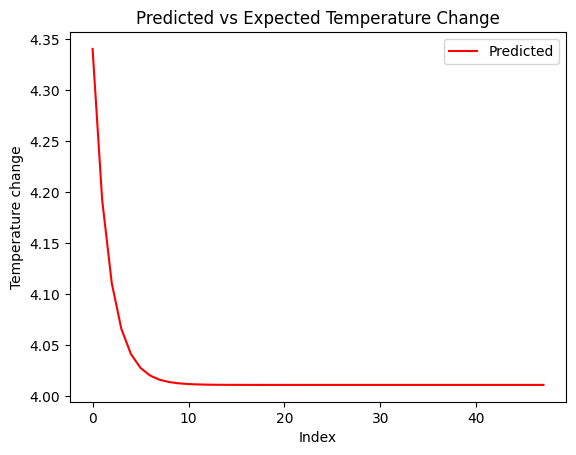

In [540]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1+36, dynamic=False).values

# Plot predictions vs expected
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature change')
plt.title('Predicted vs Expected Temperature Change')
plt.legend();

### Seasonal Autoregressive Integrated Moving Average (SARIMA) model 
It is an extension of the Autoregressive Integrated Moving Average (ARIMA) model that includes __seasonality__. It is used for time series forecasting and can capture both __non-seasonal__ and __seasonal__ patterns in the data.

__Components of SARIMA Model:__
- Seasonal Autoregressive (SAR) terms: These terms capture the linear relationship between the observations at current and previous seasonal time points.

- Seasonal Integrated (SI) term: This term represents the seasonal differencing of the time series data to make it stationary.

- Seasonal Moving Average (SMA) terms: These terms capture the linear relationship between the error terms at current and previous seasonal time points.

- Autoregressive (AR) terms: These terms capture the linear relationship between the observations at current and previous non-seasonal time points.

- Integrated (I) term: This term represents the differencing of the time series data to make it stationary.

- Moving Average (MA) terms: These terms capture the linear relationship between the error terms at current and previous non-seasonal time points.

__Parameters of SARIMA Model SARIMA(p,d,q)(P,D,Q)[m]:__
- 𝑝: Number of autoregressive (AR) terms.
- 𝑑: Degree of differencing (non-seasonal).
- 𝑞: Number of moving average (MA) terms.
- 𝑃: Number of seasonal autoregressive (SAR) terms.
- 𝐷: Degree of seasonal differencing.
- 𝑄: Number of seasonal moving average (SMA) terms.
- 𝑚: Seasonal period.

_Advantages of SARIMA Model:_
- Can capture both non-seasonal and seasonal patterns in the data.
- Provides accurate forecasts for time series data with complex patterns.

__Limitations of SARIMA Model:__
- Requires careful identification of model parameters, which can be time-consuming.
- May not perform well for time series data with irregular or unpredictable patterns.

In summary, the SARIMA model is a powerful tool for time series forecasting, especially for data with clear seasonal patterns.

In [541]:
# fix the seed for randomness
seed = 42
np.random.seed(seed)

# Fit auto ARIMA model with seasonality
auto_aarima_model = auto_arima(Train, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=12,  # Set m to the seasonal period
                              seasonal=True,  # Enable seasonal ARIMA
                              d=None, trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True, 
                              random_state=seed)

# Print best parameters found
print("Order (p,d,q):", auto_aarima_model.order)
print("Seasonal Order (P,D,Q,m):", auto_aarima_model.seasonal_order)

# Fit SARIMA model with the best parameters
model_sarima = ARIMA(Train, order=auto_aarima_model.order, seasonal_order=auto_aarima_model.seasonal_order)
sarima_fit = model_sarima.fit()

# Print summary of the fitted model
print(sarima_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6744.671, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6029.763, Time=0.50 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=11699.263, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=6584.398, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=5796.806, Time=2.35 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=5975.213, Time=1.16 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=5783.975, Time=3.40 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=6023.021, Time=0.73 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=6.18 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=5785.

### Predicted vs. Expected Temperature Using SARIMA

__Purpose of the Result__
This plot compares predicted temperatures using the SARIMA model with the actual observed temperatures.

__Interpretation of the Result__
The plot shows that the SARIMA model better predict temperature trends than ARIMA model, though there may be discrepancies during certain periods. The reason behind this is that SARIMA can achieve stationarity better than ARIMA by handling seasonal differencing. 

predicted=4.537261, expected=4.269000
predicted=3.413302, expected=2.103000
predicted=5.046325, expected=3.339000
predicted=4.401177, expected=3.935000
predicted=5.607790, expected=4.824000
predicted=3.948001, expected=5.409000
predicted=3.346459, expected=3.409000
predicted=3.623120, expected=3.669000
predicted=4.969013, expected=5.254000
predicted=4.354829, expected=4.635000
predicted=4.113499, expected=3.966000
predicted=3.440045, expected=6.736000


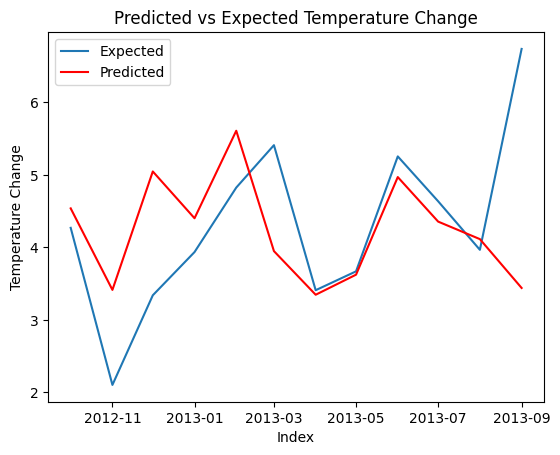

In [542]:
# Make predictions using the fitted model
predictions = sarima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature Change')
plt.title('Predicted vs Expected Temperature Change')
plt.legend();

In [543]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['SARIMA'] = metrics_df.values[0]

In [544]:
results

RMSE       MAE   MAPE (%)
Model                                        
Naive           1.443725  1.193667  35.487985
Seasonal Naive  1.766686  1.484833  39.786419
Mean            1.177103  0.892167  22.263544
Drift           1.443558  1.193528  35.482959
Autoregression  1.303498  0.879331  20.532824
AR+MA           1.459746  1.068881  23.935799
ARIMA           1.202360  0.901541  22.936924
SARIMA          1.249026  0.842824  20.169309

### Holt-Winters Seasonal Model 
The Holt-Winters Seasonal Model, also known as __Triple Exponential Smoothing__, is a time series forecasting method that extends the Holt's linear exponential smoothing method to handle seasonality in the data. It decomposes the time series into three components: __level, trend, and seasonal,__ and then forecasts future values by combining these components.

__Components of Holt-Winters Model:__
- Level (L): Represents the average value of the series over time. Updated using the previous level and the error correction term.
- Trend (T): Represents the rate of change of the series over time. Captures the slope or direction of the trend component.
- Seasonal (S): Represents the periodic fluctuations or seasonality in the data. Captures the repeating patterns at fixed intervals, such as daily, weekly, or yearly.

__Seasonal Decomposition:__
- The Holt-Winters Seasonal Model decomposes the time series into these three components using either additive or multiplicative decomposition. 
- Additive decomposition: assumes that the magnitude of seasonality remains constant over time.
- Multiplicative decomposition assumes that the magnitude of seasonality changes proportionally with the level of the series.

__Forecasting Process:__
1. Initialization: Initialize the level, trend, and seasonal components using simple methods such as averaging or linear regression.
2. Update Equations:__
- Update the level, trend, and seasonal components using exponential smoothing equations.
- The level is updated using a combination of the previous level and the error correction term.
- The trend is updated using a combination of the previous trend and the trend correction term.
- The seasonal component is updated using a combination of the previous seasonal component and the seasonal correction term.
3. Forecasting:
- The forecasted value is the sum (for additive decomposition) or the product (for multiplicative decomposition) of the level, trend, and seasonal components.


__Model Parameters (α, β, γ, m):__
- α, 𝛽, and 𝛾 are smoothing parameters controlling the weights assigned to the current observation, trend, and seasonal components, respectively.
- These parameters are typically chosen through optimization techniques such as grid search or cross-validation.
- Seasonal Period (m): Specifies the length of the seasonal cycle in the data. This parameter needs to be determined based on domain knowledge or through exploratory data analysis.

__Advantages:__
- Accurate forecasting of time series data with trend and seasonality.
- Adaptability to changes in the data over time.
- Interpretability of the model parameters, providing insights into underlying patterns.

__Limitations:__
- Assumes that the data is stationary or can be made stationary through differencing.
- Complexity in tuning model parameters and selecting the appropriate seasonal period.

In summary, the Holt-Winters Seasonal Model is a powerful method for time series forecasting, capable of capturing trend and seasonality in the data. By decomposing the time series into level, trend, and seasonal components, and then combining these components for forecasting, the model provides accurate forecasts and valuable insights into time series data.

### Predicted vs. Expected Temperature Using Holt_Winters

__Purpose of the Result__
This plot compares predicted temperatures using the Holt-Winters model with the actual observed temperatures.

__Interpretation of the Result__
The plot shows that the ARIMA model cannot accurately predict temperature trends, the prediction values are way below the actual values.

predicted=3.754320, expected=4.269000
predicted=3.860616, expected=2.103000
predicted=4.726239, expected=3.339000
predicted=3.046967, expected=3.935000
predicted=3.564899, expected=4.824000
predicted=3.772277, expected=5.409000
predicted=4.570292, expected=3.409000
predicted=3.805722, expected=3.669000
predicted=3.638221, expected=5.254000
predicted=4.084554, expected=4.635000
predicted=4.181458, expected=3.966000
predicted=4.684484, expected=6.736000


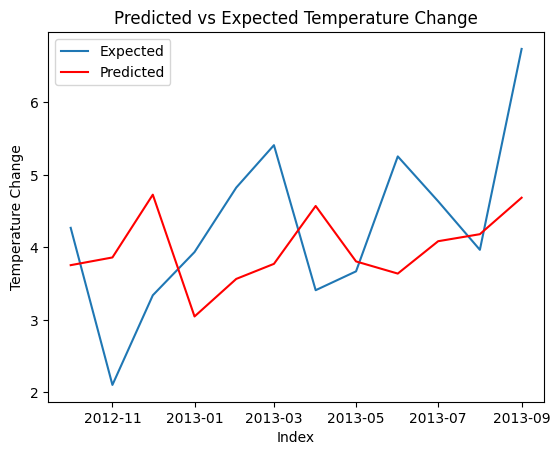

In [545]:
# Fix the seed for randomness
seed = 42
np.random.seed(seed)

# Fit Holt-Winters Seasonal Model
holt_winters_model = ExponentialSmoothing(
    Train,
    seasonal_periods=320,
    trend='add',        # 'add' for additive trend, can be 'mul' for multiplicative
    seasonal='add'      # 'add' for additive seasonality, can be 'mul' for multiplicative
).fit()

# Make predictions using the fitted model
predictions = holt_winters_model.forecast(len(Test))

# Print predicted and expected values
for i in range(len(predictions)):
    print(f'predicted={predictions.iloc[i]:.6f}, expected={Test.iloc[i]:.6f}')

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Temperature Change')
plt.title('Predicted vs Expected Temperature Change')
plt.legend()
plt.show()

In [546]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Holt_Winters'] = metrics_df.values[0]

In [547]:
results

RMSE       MAE   MAPE (%)
Model                                        
Naive           1.443725  1.193667  35.487985
Seasonal Naive  1.766686  1.484833  39.786419
Mean            1.177103  0.892167  22.263544
Drift           1.443558  1.193528  35.482959
Autoregression  1.303498  0.879331  20.532824
AR+MA           1.459746  1.068881  23.935799
ARIMA           1.202360  0.901541  22.936924
SARIMA          1.249026  0.842824  20.169309
Holt_Winters    1.253911  1.097884  27.701384

In [548]:
from keras.layers import Dense, Input
from keras.models import Sequential, Model

In [549]:
# split a univariate sequence into samples (input and output)
def split_sequence(sequence, n_steps):
    X = [sequence[i:i+n_steps] for i in range(len(sequence) - n_steps)]
    y = [sequence[i+n_steps] for i in range(len(sequence) - n_steps)]
    return np.array(X), np.array(y)

In [550]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Choose a number of time steps
n_steps = 3
# Split into samples: Three time steps are used as input and one time step is used as output (to be predicted)
X, y = split_sequence(raw_seq, n_steps)
# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


## 1. Univariate MLP Models

In [551]:
# Define the model
model = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model.add(Dense(100, activation='relu', input_dim=n_steps))

#Note: the model will view each time step as a separate feature instead of separate time steps.

# Add an output layer with a single neuron (single-step forecasting)
model.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model.compile(optimizer='adam', loss='mse')

In [552]:
# fit model
model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 7010.4702
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6780.5625
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6556.1792
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6336.9526
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6123.0513
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5913.7759
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5709.1001
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5508.9556
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5313.2046
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5122.0776
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4936.1294
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4755.0444
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4578.4585
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4406.2163
Epoch 15/1000
1/1 ━━━━━━━━━━

In [553]:
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [554]:
print(yhat)

[[104.83255]]


In [555]:
X, y = split_sequence(df['AverageTemperature'].tolist(), 24)

In [556]:
X

array([[-1.1  , -0.079,  2.68 , ..., 13.14 ,  7.484,  4.36 ],
       [-0.079,  2.68 ,  8.4  , ...,  7.484,  4.36 ,  1.261],
       [ 2.68 ,  8.4  , 13.796, ...,  4.36 ,  1.261,  2.033],
       ...,
       [24.041, 25.001, 21.754, ..., 10.102, 15.256, 19.961],
       [25.001, 21.754, 15.429, ..., 15.256, 19.961, 24.286],
       [21.754, 15.429, 10.88 , ..., 19.961, 24.286, 25.669]])

In [557]:
y

array([ 1.261,  2.033,  4.799, ..., 24.286, 25.669, 25.669])

In [558]:
import os
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 20% testing, and 20% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [559]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the model
model_1 = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model_1.add(Dense(100, activation='relu', input_dim=24))

#Note: the model will view each time step as a separate feature instead of separate time steps.

# Add an output layer with a single neuron (single-step forecasting)
model_1.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model_1.compile(optimizer='adam', loss='mse')

In [560]:
# fit model
history_1 = model_1.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val))

Epoch 1/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.9606 - val_loss: 5.3887
Epoch 2/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 3.4528 - val_loss: 1.5977
Epoch 3/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.5657 - val_loss: 1.3897
Epoch 4/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.3361 - val_loss: 1.3261
Epoch 5/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2479 - val_loss: 1.3155
Epoch 6/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 1.2103 - val_loss: 1.3194
Epoch 7/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.1872 - val_loss: 1.3119
Epoch 8/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1658 - val_loss: 1.2829
Epoch 9/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.1397 - val_loss: 1.2471
Epoch 10/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.1145 - val_loss: 1.2174
Epoch 11/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 1.0932 - val_loss: 1.1959
Epoch 12/2000
39/39 ━━━━━━━━━━━━━━

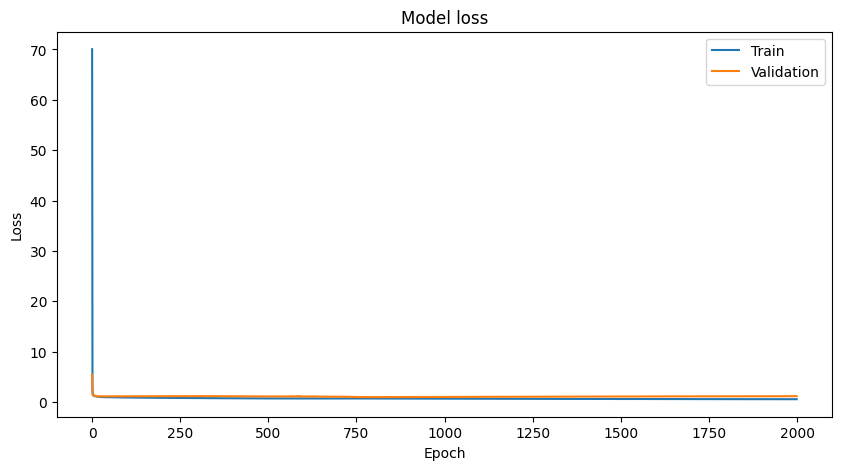

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


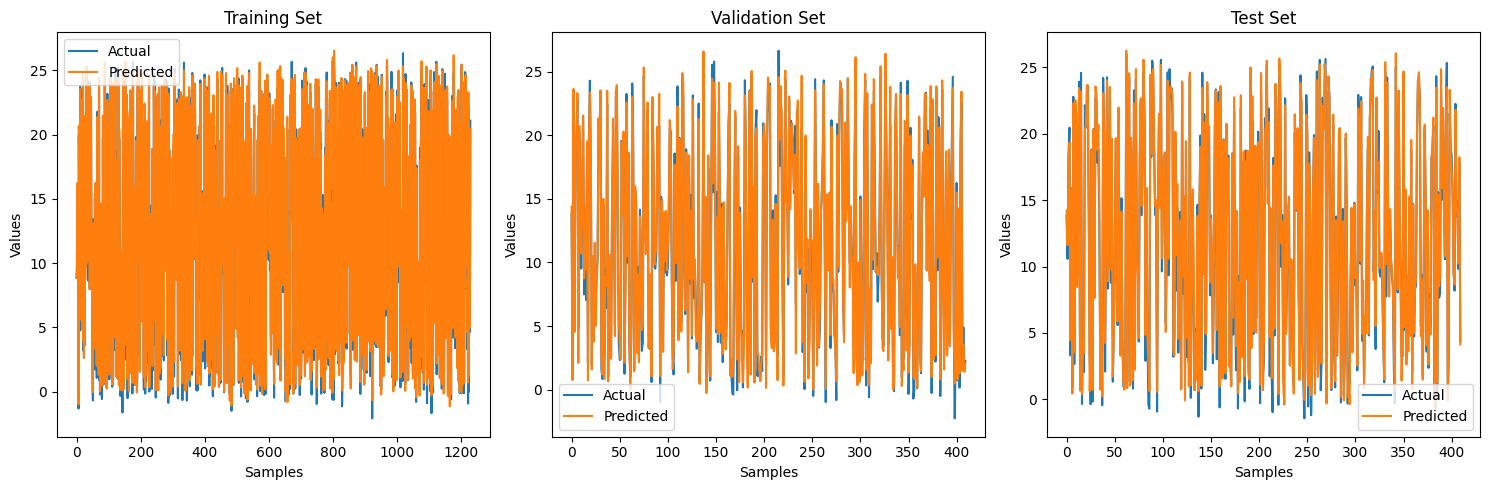

In [561]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Predict values
y_train_pred = model_1.predict(X_train)
y_val_pred = model_1.predict(X_val)
y_test_pred = model_1.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val, label='Actual')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [562]:
from keras.callbacks import EarlyStopping

Epoch 1/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103.8990 - val_loss: 3.7771
Epoch 2/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 2.8356 - val_loss: 1.6057
Epoch 3/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5819 - val_loss: 1.4380
Epoch 4/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4844 - val_loss: 1.4141
Epoch 5/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4344 - val_loss: 1.3957
Epoch 6/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3887 - val_loss: 1.3601
Epoch 7/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3424 - val_loss: 1.3305
Epoch 8/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3026 - val_loss: 1.3150
Epoch 9/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2741 - val_loss: 1.3040
Epoch 10/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2509 - val_loss: 1.2944
Epoch 11/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2319 - val_loss: 1.2862
Epoch 12/2000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

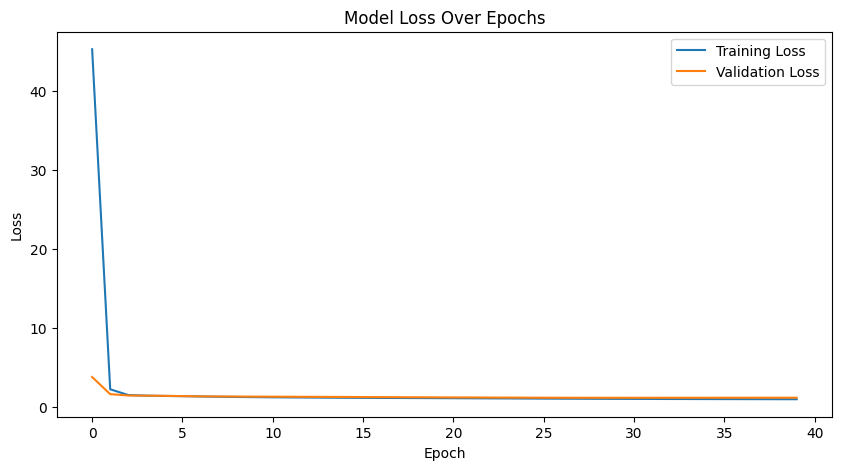

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


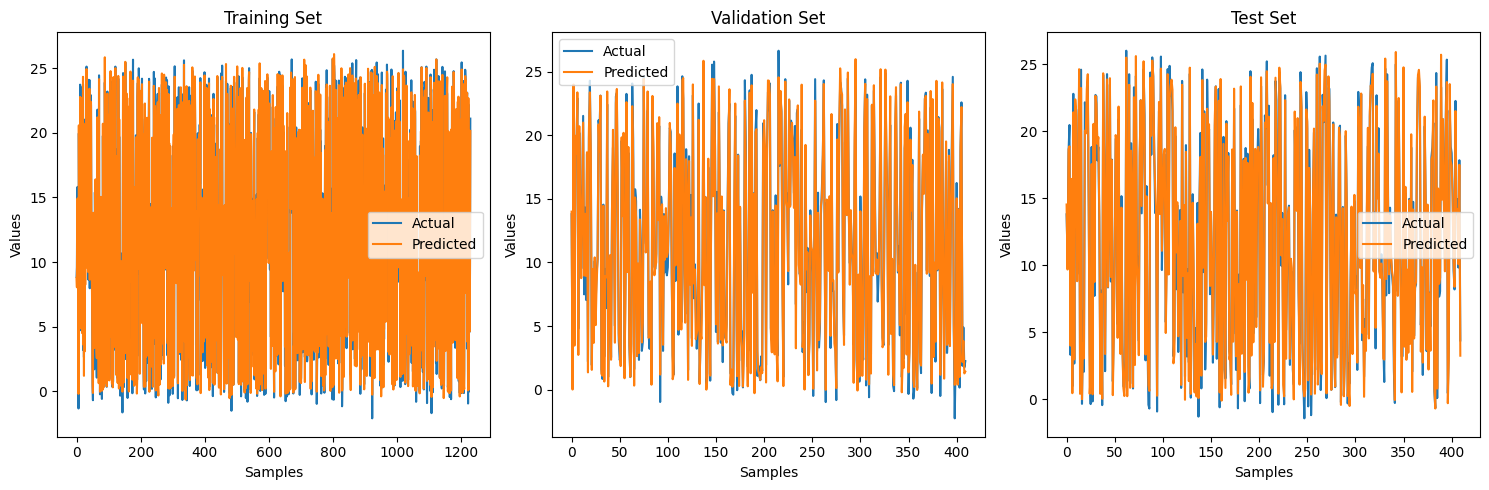

In [563]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the model
model_2 = Sequential()

# Add a dense (fully connected) layer (single hidden layer) with 100 neurons and ReLU activation function
# input_dim is set to n_steps, the number of input observations
model_2.add(Dense(100, activation='relu', input_dim=24))

#Note: the model will view each time step as a separate feature instead of separate time steps.

# Add an output layer with a single neuron (single-step forecasting)
model_2.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error (mse) loss function
model_2.compile(optimizer='adam', loss='mse')

# Fit the model with EarlyStopping
history_2 = model_2.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_2.predict(X_train)
y_val_pred = model_2.predict(X_val)
y_test_pred = model_2.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val, label='Actual')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [564]:
# Function to print MAE for training, validation, and testing sets
def print_mae(model, X_train, y_train, X_val, y_val, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f'Training MAE: {train_mae}')
    print(f'Validation MAE: {val_mae}')
    print(f'Test MAE: {test_mae}')

In [565]:
# Print the MAE for the training, validation, and testing sets
print_mae(model_1, X_train, y_train, X_val, y_val, X_test, y_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
Training MAE: 0.6065464909629573
Validation MAE: 0.8359287663122504
Test MAE: 0.7700975326372356


In [566]:
# Print the MAE for the training, validation, and testing sets
print_mae(model_2, X_train, y_train, X_val, y_val, X_test, y_test)
# Model 2 with less computational time and less epochs has small MAE for testing and validation

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
Training MAE: 0.7515768110559082
Validation MAE: 0.8451865353150522
Test MAE: 0.7977001721004525


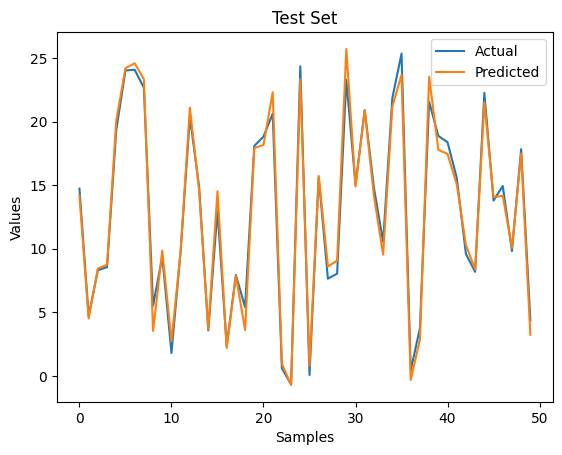

In [567]:
# Test set
plt.plot(y_test [-50:], label='Actual')
plt.plot(y_test_pred[-50:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend();

In [568]:
# Calculate metrics for the predictions
metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['MLP'] = metrics_df.values[0]

In [569]:
results

RMSE       MAE    MAPE (%)
Model                                         
Naive           1.443725  1.193667   35.487985
Seasonal Naive  1.766686  1.484833   39.786419
Mean            1.177103  0.892167   22.263544
Drift           1.443558  1.193528   35.482959
Autoregression  1.303498  0.879331   20.532824
AR+MA           1.459746  1.068881   23.935799
ARIMA           1.202360  0.901541   22.936924
SARIMA          1.249026  0.842824   20.169309
Holt_Winters    1.253911  1.097884   27.701384
MLP             1.011740  0.797700  452.680095

In [570]:
df.head()

AverageTemperature Country
dt                                    
1841-01-01              -1.100   Japan
1841-02-01              -0.079   Japan
1841-03-01               2.680   Japan
1841-04-01               8.400   Japan
1841-05-01              13.796   Japan

In [571]:
df.columns

Index(['AverageTemperature', 'Country'], dtype='object')

### Multi-headed Convolutional Neural Network model

In [572]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate

In [573]:
# Resample the data to daily frequency, aggregating by sum
df_daily = df.AverageTemperature.resample('D').sum()

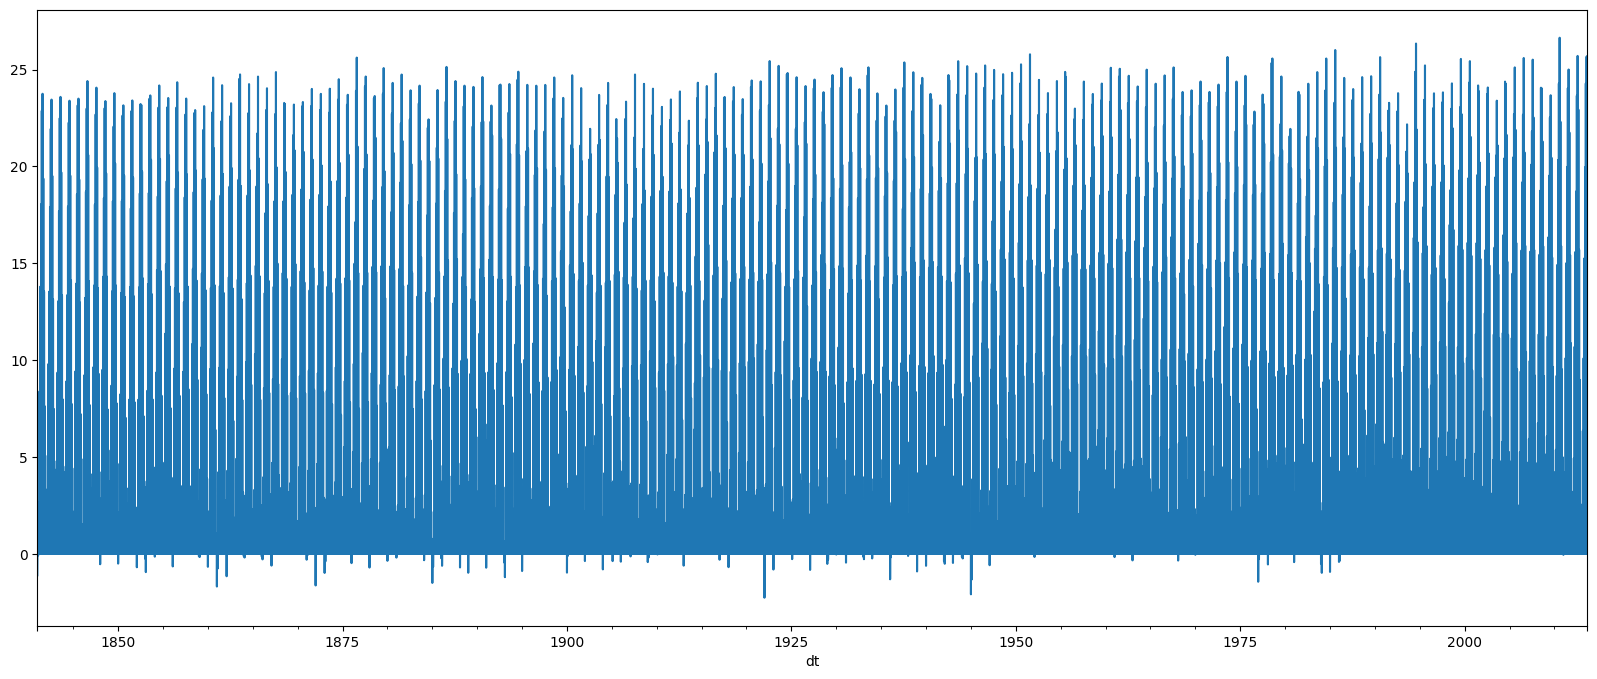

In [574]:
df_daily.plot(figsize=(20, 8));

In [575]:

def feature_engineering(dataframe):
    """
    Create time-based features from the datetime index of the DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame with a datetime index.
    
    Returns:
    DataFrame: A new DataFrame with additional time-based features.
    """
    new_df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['quarter'] = dataframe.index.quarter
    new_df['month'] = dataframe.index.month
    new_df['year'] = dataframe.index.year
    new_df['dayofyear'] = dataframe.index.dayofyear
    return new_df

# Apply the feature creation function to the DataFrame
df_eng = feature_engineering(df)

In [576]:
df_eng

AverageTemperature Country  dayofweek  quarter  month  year  \
dt                                                                        
1841-01-01              -1.100   Japan          4        1      1  1841   
1841-02-01              -0.079   Japan          0        1      2  1841   
1841-03-01               2.680   Japan          0        1      3  1841   
1841-04-01               8.400   Japan          3        2      4  1841   
1841-05-01              13.796   Japan          5        2      5  1841   
...                        ...     ...        ...      ...    ...   ...   
2013-05-01              15.256   Japan          2        2      5  2013   
2013-06-01              19.961   Japan          5        2      6  2013   
2013-07-01              24.286   Japan          0        3      7  2013   
2013-08-01              25.669   Japan          3        3      8  2013   
2013-09-01              25.669   Japan          6        3      9  2013   

            dayofyear  
dt                     
1841-01-01          1  
1841-02-01         32  
1841-03-01         60  
1841-04-01         91  
1841-05-01        121  
...               ...  
2013-05-01        121  
2013-06-01        152  
2013-07-01        182  
2013-08-01        213  
2013-09-01        244  

[2073 rows x 7 columns]

In [577]:
df_eng = df_eng.drop(columns=['Country'])

In [578]:
df_eng

AverageTemperature  dayofweek  quarter  month  year  dayofyear
dt                                                                        
1841-01-01              -1.100          4        1      1  1841          1
1841-02-01              -0.079          0        1      2  1841         32
1841-03-01               2.680          0        1      3  1841         60
1841-04-01               8.400          3        2      4  1841         91
1841-05-01              13.796          5        2      5  1841        121
...                        ...        ...      ...    ...   ...        ...
2013-05-01              15.256          2        2      5  2013        121
2013-06-01              19.961          5        2      6  2013        152
2013-07-01              24.286          0        3      7  2013        182
2013-08-01              25.669          3        3      8  2013        213
2013-09-01              25.669          6        3      9  2013        244

[2073 rows x 6 columns]

In [579]:
def create_multivariate_data(df, window_size):
    """
    Convert the DataFrame to a multivariate dataset for MLP with a sliding window approach.
    
    Parameters:
    df (DataFrame): The input DataFrame.
    window_size (int): The size of the sliding window (e.g., 7 for a week).
    
    Returns:
    X, y (numpy arrays): Multivariate input features and target values.
    """
    X, y = [], []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i + window_size].values)
        y.append(df.iloc[i + window_size]['AverageTemperature'])
    return np.array(X), np.array(y)

In [580]:
X, y = create_multivariate_data(df_eng, 7)

In [581]:
X[0]

array([[-1.1000e+00,  4.0000e+00,  1.0000e+00,  1.0000e+00,  1.8410e+03,
         1.0000e+00],
       [-7.9000e-02,  0.0000e+00,  1.0000e+00,  2.0000e+00,  1.8410e+03,
         3.2000e+01],
       [ 2.6800e+00,  0.0000e+00,  1.0000e+00,  3.0000e+00,  1.8410e+03,
         6.0000e+01],
       [ 8.4000e+00,  3.0000e+00,  2.0000e+00,  4.0000e+00,  1.8410e+03,
         9.1000e+01],
       [ 1.3796e+01,  5.0000e+00,  2.0000e+00,  5.0000e+00,  1.8410e+03,
         1.2100e+02],
       [ 1.8046e+01,  1.0000e+00,  2.0000e+00,  6.0000e+00,  1.8410e+03,
         1.5200e+02],
       [ 2.2872e+01,  3.0000e+00,  3.0000e+00,  7.0000e+00,  1.8410e+03,
         1.8200e+02]])

In [582]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]
X4 = X[:, :, 3]
X5 = X[:, :, 4]
X6 = X[:, :, 5]

In [583]:
# Split data into training, validation, and test sets (60% training, 20% validation, 20% testing)
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.4, random_state=seed)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=seed)

X2_train, X2_temp, _, _ = train_test_split(X2, y, test_size=0.4, random_state=seed)
X2_val, X2_test, _, _ = train_test_split(X2_temp, y_temp, test_size=0.5, random_state=seed)

X3_train, X3_temp, _, _ = train_test_split(X3, y, test_size=0.4, random_state=seed)
X3_val, X3_test, _, _ = train_test_split(X3_temp, y_temp, test_size=0.5, random_state=seed)

X4_train, X4_temp, _, _ = train_test_split(X4, y, test_size=0.4, random_state=seed)
X4_val, X4_test, _, _ = train_test_split(X4_temp, y_temp, test_size=0.5, random_state=seed)

X5_train, X5_temp, _, _ = train_test_split(X5, y, test_size=0.4, random_state=seed)
X5_val, X5_test, _, _ = train_test_split(X5_temp, y_temp, test_size=0.5, random_state=seed)

X6_train, X6_temp, _, _ = train_test_split(X6, y, test_size=0.4, random_state=seed)
X6_val, X6_test, _, _ = train_test_split(X6_temp, y_temp, test_size=0.5, random_state=seed)

In [584]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv1D, Flatten, Dense, concatenate

# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Ensure the input data arrays are of type float32
X1_train = X1_train.astype(np.float32)
X2_train = X2_train.astype(np.float32)
X3_train = X3_train.astype(np.float32)
X4_train = X4_train.astype(np.float32)
X5_train = X5_train.astype(np.float32)
X6_train = X6_train.astype(np.float32)
X1_val = X1_val.astype(np.float32)
X2_val = X2_val.astype(np.float32)
X3_val = X3_val.astype(np.float32)
X4_val = X4_val.astype(np.float32)
X5_val = X5_val.astype(np.float32)
X6_val = X6_val.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# Define the number of time steps
n_steps = 7
n_features = 1  # Assuming each time step has a single feature

# First input model
visible1 = Input(shape=(n_steps, n_features))
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
flat1 = Flatten()(conv1)

# Second input model
visible2 = Input(shape=(n_steps, n_features))
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
flat2 = Flatten()(conv2)

# Third input model
visible3 = Input(shape=(n_steps, n_features))
conv3 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible3)
flat3 = Flatten()(conv3)

# Fourth input model
visible4 = Input(shape=(n_steps, n_features))
conv4 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible4)
flat4 = Flatten()(conv4)

# Fifth input model
visible5 = Input(shape=(n_steps, n_features))
conv5 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible5)
flat5 = Flatten()(conv5)

# Sixth input model
visible6 = Input(shape=(n_steps, n_features))
conv6 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible6)
flat6 = Flatten()(conv6)

# Merge input models
merged = concatenate([flat1, flat2, flat3, flat4, flat5, flat6])
dense1 = Dense(100, activation='relu')(merged)
output = Dense(1)(dense1)

# Create and compile the model
model_3 = Model(inputs=[visible1, visible2, visible3, visible4, visible5, visible6], outputs=output)
model_3.compile(optimizer='adam', loss='mse')

# Fit the model
history_3 = model_3.fit(
    [X1_train, X2_train, X3_train, X4_train, X5_train, X6_train], y_train,
    epochs=1000, verbose=1,
    validation_data=([X1_val, X2_val, X3_val, X4_val, X5_val, X6_val], y_val)
)


Epoch 1/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20140.5254 - val_loss: 772.9012
Epoch 2/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.7435 - val_loss: 5.5345
Epoch 3/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3575 - val_loss: 2.8202
Epoch 4/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7427 - val_loss: 2.0420
Epoch 5/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9638 - val_loss: 1.7444
Epoch 6/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6608 - val_loss: 1.5862
Epoch 7/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5363 - val_loss: 1.5141
Epoch 8/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4895 - val_loss: 1.4663
Epoch 9/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4672 - val_loss: 1.4928
Epoch 10/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4504 - val_loss: 1.4742
Epoch 11/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4139 - val_loss: 1.4468
Epoch 12/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 

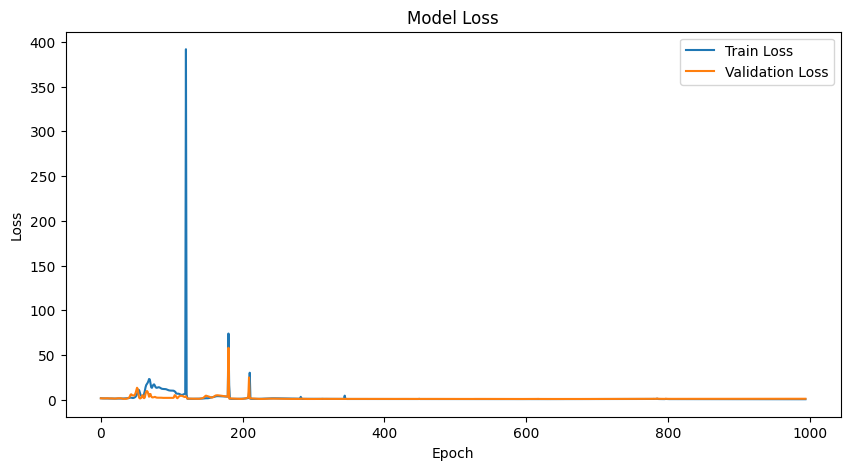

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


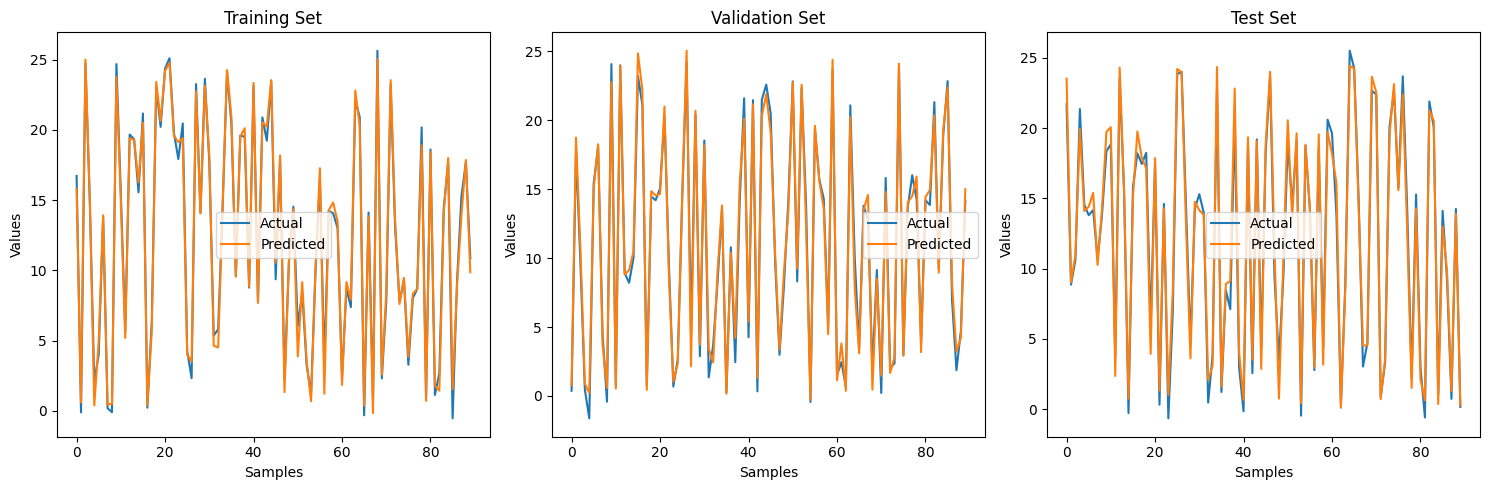

In [585]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['loss'][5:], label='Train Loss')
plt.plot(history_3.history['val_loss'][5:], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_3.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train])
y_val_pred = model_3.predict([X1_val, X2_val, X3_val, X4_val, X5_val, X6_val])
y_test_pred = model_3.predict([X1_test, X2_test, X3_test, X4_test, X5_test, X6_test])

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-90:], label='Actual')
plt.plot(y_train_pred[-90:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-90:], label='Actual')
plt.plot(y_val_pred[-90:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-90:], label='Actual')
plt.plot(y_test_pred[-90:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [586]:
# Calculate metrics for the predictions
metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multi_headed CNN'] = metrics_df.values[0]

In [587]:
results

RMSE       MAE    MAPE (%)
Model                                           
Naive             1.443725  1.193667   35.487985
Seasonal Naive    1.766686  1.484833   39.786419
Mean              1.177103  0.892167   22.263544
Drift             1.443558  1.193528   35.482959
Autoregression    1.303498  0.879331   20.532824
AR+MA             1.459746  1.068881   23.935799
ARIMA             1.202360  0.901541   22.936924
SARIMA            1.249026  0.842824   20.169309
Holt_Winters      1.253911  1.097884   27.701384
MLP               1.011740  0.797700  452.680095
Multi_headed CNN  1.146496  0.893364  725.404161

### LSTM

In [610]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, MaxPooling1D, Conv1D, TimeDistributed, Flatten, ConvLSTM2D, RepeatVector, TimeDistributed

# Load the data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

series = df.drop(columns=['Country'])


# Split the data into train and test sets with 80% for training and 20% for testing
train_size = int(len(df) * 0.8)
Train = df['AverageTemperature'][:train_size]
Test = df['AverageTemperature'][train_size:]



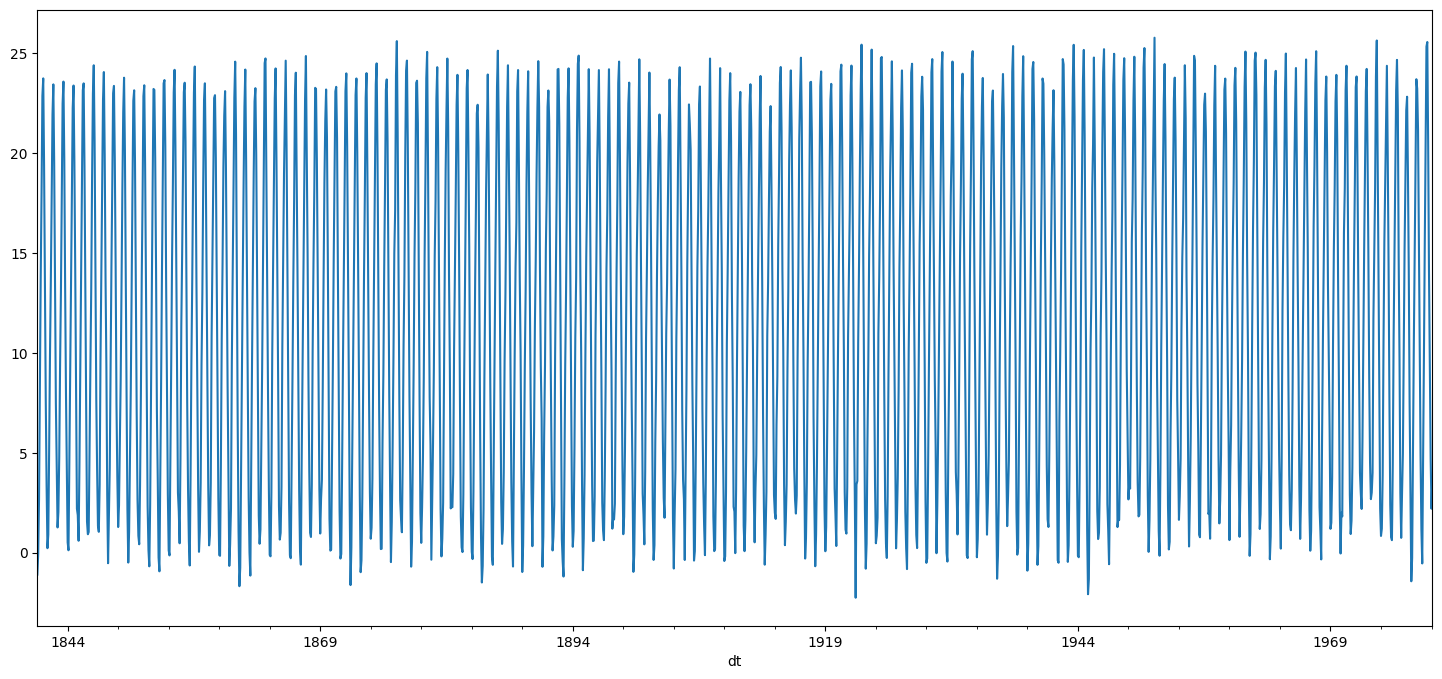

In [611]:
Train.plot(figsize=(18, 8));

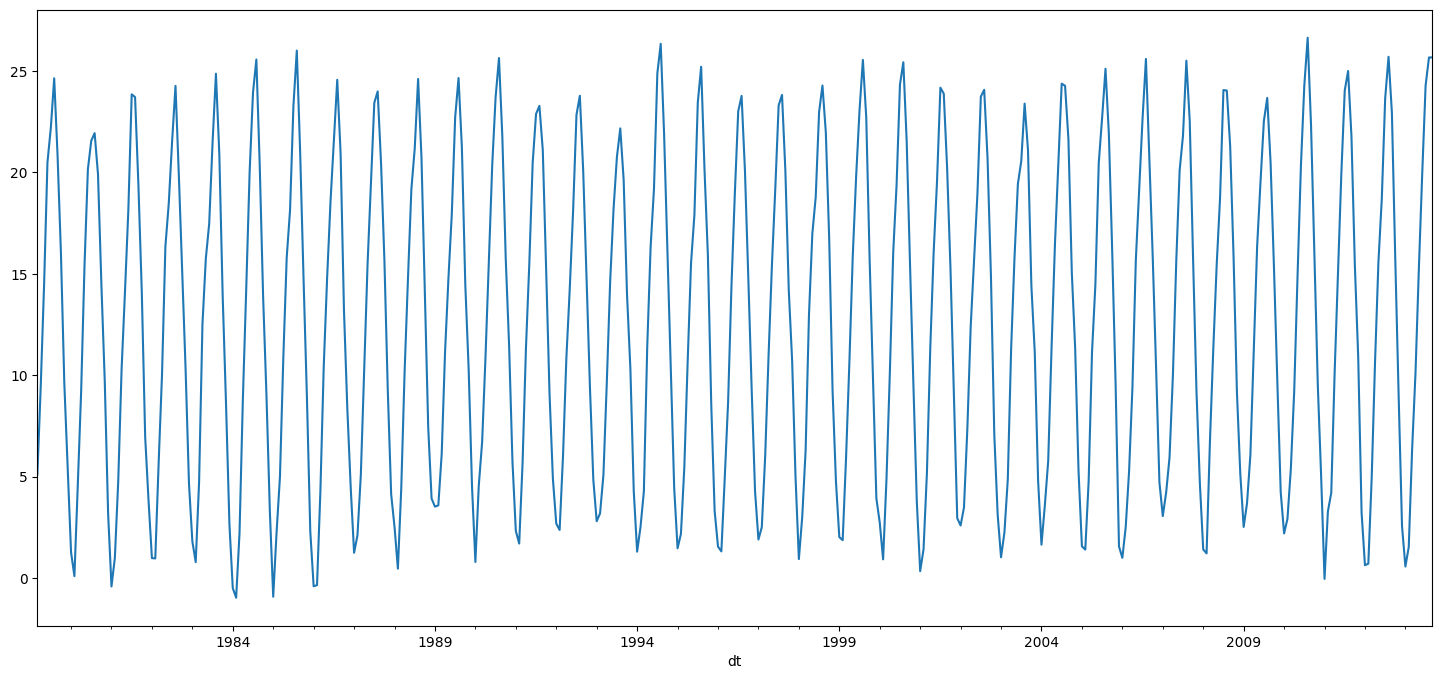

In [612]:
Test.plot(figsize=(18, 8));

In [613]:
train_set = Train.values.reshape(-1, 1)
test_set = Test.values.reshape(-1, 1)

In [614]:
train_set

array([[-1.1  ],
       [-0.079],
       [ 2.68 ],
       ...,
       [ 4.69 ],
       [ 2.197],
       [ 3.689]])

In [615]:
# It is always a good idea to normalize or scale data when using neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = scaler.fit_transform(train_set)

In [616]:
train_set_scaled

array([[0.04132644],
       [0.07773222],
       [0.17610982],
       ...,
       [0.24778035],
       [0.1588875 ],
       [0.21208772]])

In [617]:
train_set_scaled.shape

(1658, 1)

In [618]:
# Initialize lists to store feature sets and labels
features_set, labels = [], []

# Loop over the training data to create feature sets and labels
for i in range(60, len(train_set_scaled)):
    # Append the past 60 days' data to the features_set
    features_set.append(train_set_scaled[i-60:i, 0])
    # Append the current day's data to the labels
    labels.append(train_set_scaled[i, 0])

In [619]:
features_set, labels = np.array(features_set), np.array(labels)

In [620]:
features_set.shape

(1598, 60)

In [621]:
labels.shape

(1598,)

In [622]:
# LSTM expects three-dimensional input: (samples, time steps, features).
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [623]:
# Fix seed for reproducibility
np.random.seed(100)
tf.random.set_seed(100)

# Initialize the model
model = Sequential()

# Add the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer without return sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model and store the history for plotting
history = model.fit(features_set, labels, epochs=100, batch_size=32, verbose=1)

# If you get the following error: NotImplementedError: Cannot convert a symbolic Tensor 
# Run the following code in anaconda prompt: conda install numpy=1.19

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1362
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0884
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0598
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0087
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0071
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0064
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0061
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0065
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0053
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0055
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0050
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0046
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0047
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0042
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - lo

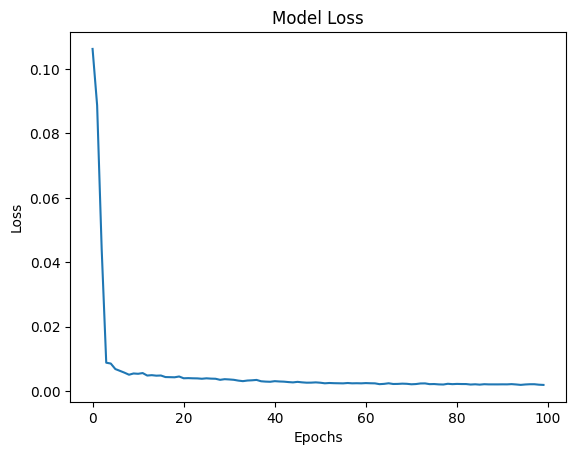

In [602]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [625]:
train_set_scaled

array([[0.04132644],
       [0.07773222],
       [0.17610982],
       ...,
       [0.24778035],
       [0.1588875 ],
       [0.21208772]])

In [626]:
# Fetch the last 60 days of training data
last_60_days_train = train_set[-60:]

# Concatenate the last 60 days of training data with the test data
test_inputs = np.concatenate((last_60_days_train, test_set), axis=0)

In [627]:
# Scale test inputs
test_set_scaled = scaler.transform(test_inputs)

# Prepare test features for prediction
test_features = []
for i in range(60, len(test_inputs)):
    test_features.append(test_set_scaled[i-60:i, 0])

# Convert test features to a numpy array and reshape for LSTM model
test_features = np.array(test_features)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

In [628]:
test_features.shape

(415, 60, 1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


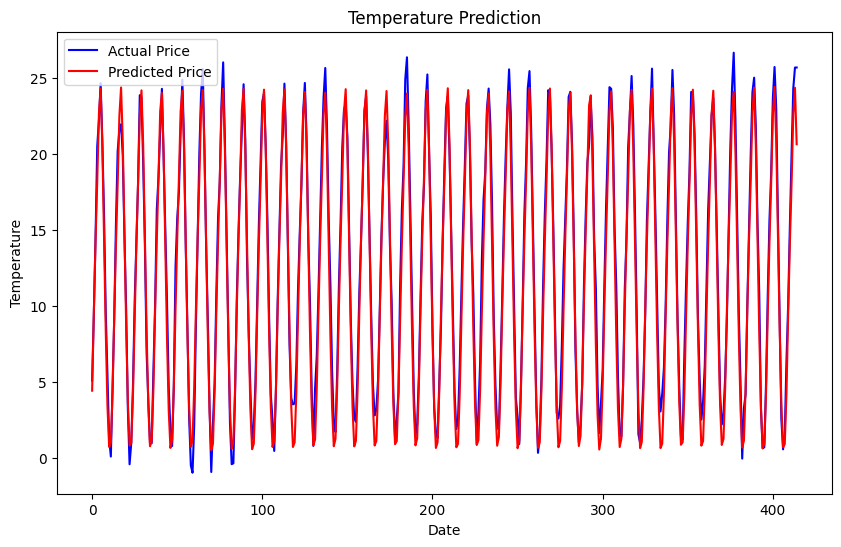

In [629]:
# Make predictions using the trained model
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_set, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Temperature Prediction')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [630]:
# Calculate metrics for the predictions
metrics = calculate_metrics(test_set, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['LSTP'] = metrics_df.values[0]

In [631]:
results

RMSE       MAE    MAPE (%)
Model                                           
Naive             1.443725  1.193667   35.487985
Seasonal Naive    1.766686  1.484833   39.786419
Mean              1.177103  0.892167   22.263544
Drift             1.443558  1.193528   35.482959
Autoregression    1.303498  0.879331   20.532824
AR+MA             1.459746  1.068881   23.935799
ARIMA             1.202360  0.901541   22.936924
SARIMA            1.249026  0.842824   20.169309
Holt_Winters      1.253911  1.097884   27.701384
MLP               1.011740  0.797700  452.680095
Multi_headed CNN  1.146496  0.893364  725.404161
LSTP              1.327099  1.083715   25.634443

### Grid Search

In [632]:
import numpy as np
import pandas as pd
from math import sqrt
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

            AverageTemperature
dt                            
1841-01-01              -1.100
1841-02-01              -0.079
1841-03-01               2.680
1841-04-01               8.400
1841-05-01              13.796
(2073, 1)


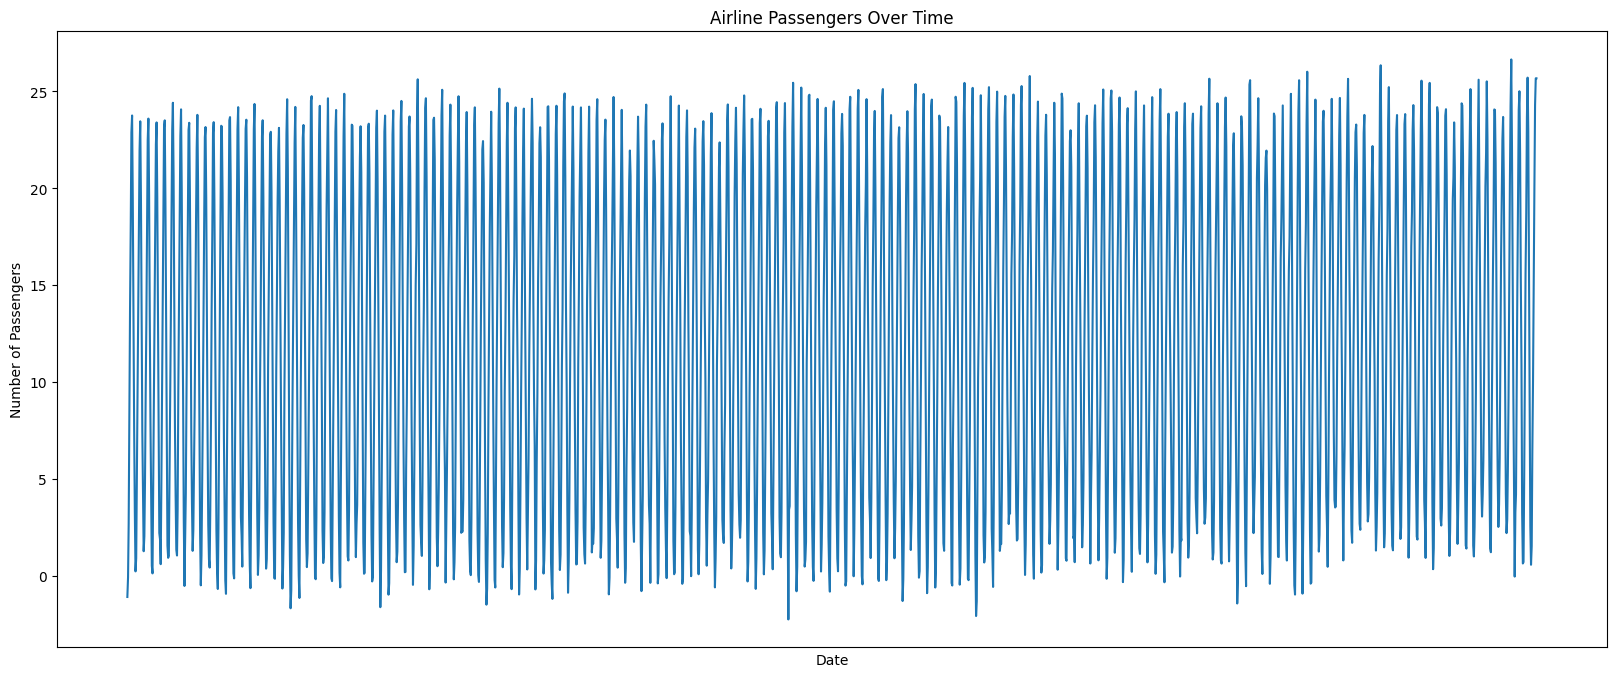

In [633]:
# Load the time series data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

series = df.drop(columns=['Country'])

print(series.head())

# Print the shape of the dataset (rows, columns)
print(series.shape)

# Plot the time series data with specified figure size
plt.figure(figsize=(20, 8))
plt.plot(series)
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.xticks([])
plt.show()

In [634]:
# split a univariate dataset into train/test sets
def train_test_split(data, test_size):
    return data[:-test_size], data[-test_size:]

In [635]:
def series_to_supervised(data, n_in, n_out=1):
    """
    Transform a time series into a supervised learning format.
    
    Parameters:
    data (list or array): The univariate time series data.
    n_in (int): The number of lag observations as input (X).
    n_out (int): The number of observations as output (y). Default is 1.
    
    Returns:
    ndarray: The transformed data suitable for supervised learning.
    """
    df = pd.DataFrame(data)
    cols = []

    # Create input sequence (t-n, ..., t-1)
    cols += [df.shift(i) for i in range(n_in, 0, -1)]
    
    # Create forecast sequence (t, t+1, ..., t+n)
    cols += [df.shift(-i) for i in range(n_out)]
    
    # Combine all sequences and drop rows with NaN values
    agg = pd.concat(cols, axis=1).dropna()
    
    return agg.values

In [636]:
print(series_to_supervised(series, 3, 1))

[[-1.1   -0.079  2.68   8.4  ]
 [-0.079  2.68   8.4   13.796]
 [ 2.68   8.4   13.796 18.046]
 ...
 [10.102 15.256 19.961 24.286]
 [15.256 19.961 24.286 25.669]
 [19.961 24.286 25.669 25.669]]


In [637]:
# Fit a model (dummy function, replace with actual model fitting)
def model_fit(train, config):
    return None

# Forecast with a pre-fit model
def model_predict(model, history, offset):
    return history[-offset]

# Calculate root mean squared error (RMSE)
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [638]:
# Walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = []
    # Split dataset into training and test sets
    train, test = train_test_split(data, n_test)
    
    # Fit the model
    model = model_fit(train, cfg)
    # Seed history with the training dataset
    history = list(train)
    
    # Step over each time step in the test set
    for i in range(len(test)):
        # Make forecast for the current history
        yhat = model_predict(model, history, cfg)
        # Store the forecast in the list of predictions
        predictions.append(yhat)
        # Add actual observation to history for the next prediction
        history.append(test[i])
    
    # Estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

In [639]:
# Score a model, returning None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    """
    Evaluate a model configuration multiple times and return the average score.
    
    Parameters:
    data (array-like): The dataset for model evaluation.
    config (dict): The model configuration.
    n_test (int): The number of test samples.
    n_repeats (int): The number of times to repeat the evaluation.
    
    Returns:
    tuple: A tuple containing the configuration key and the average score.
    """
    # Convert config to a string key
    key = str(config)
    
    # Fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    
    # Calculate and summarize the average score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    
    return key, result

In [640]:
# Grid search through configurations
def grid_search(data, cfg_list, n_test):
    """
    Perform a grid search to evaluate a list of configurations.
    
    Parameters:
    data (array-like): The dataset for model evaluation.
    cfg_list (list): A list of model configurations to evaluate.
    n_test (int): The number of test samples.
    
    Returns:
    list: A list of tuples with configuration and corresponding error, sorted by error.
    """
    # Evaluate each configuration
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    
    # Sort configurations by error in ascending order
    scores.sort(key=lambda tup: tup[1])
    
    return scores

In [641]:
# Define dataset
data = series.values

# Number of test samples: We will use the first 11 years (132 observations) for training and the last 12 for the test set. 
n_test = 12

# Model configurations
cfg_list = [1, 6, 12, 24, 36]

# Perform grid search
scores = grid_search(data, cfg_list, n_test)
print('done')

# List top 10 configurations
for cfg, error in scores[:10]:
    print(cfg, error)

 > 4.567
 > 4.567
 > 4.567
 > 4.567
 > 4.567
 > 4.567
 > 4.567
 > 4.567
 > 4.567
 > 4.567
> Model[1] 4.567
 > 17.354
 > 17.354
 > 17.354
 > 17.354
 > 17.354
 > 17.354
 > 17.354
 > 17.354
 > 17.354
 > 17.354
> Model[6] 17.354
 > 1.180
 > 1.180
 > 1.180
 > 1.180
 > 1.180
 > 1.180
 > 1.180
 > 1.180
 > 1.180
 > 1.180
> Model[12] 1.180
 > 1.588
 > 1.588
 > 1.588
 > 1.588
 > 1.588
 > 1.588
 > 1.588
 > 1.588
 > 1.588
 > 1.588
> Model[24] 1.588
 > 1.362
 > 1.362
 > 1.362
 > 1.362
 > 1.362
 > 1.362
 > 1.362
 > 1.362
 > 1.362
 > 1.362
> Model[36] 1.362
done
12 1.1796118005513507
36 1.362389750891181
24 1.5883320916399482
1 4.567018246806845
6 17.35441715385452


In [642]:
# Difference dataset
def difference(data, order):
    """
    Apply differencing to a dataset.
    
    Parameters:
    data (list or array): The time series data.
    order (int): The lag order to difference by.
    
    Returns:
    list: The differenced dataset.
    """
    return [data[i] - data[i - order] for i in range(order, len(data))]

In [643]:
# Fit a model
def model_fit(train, config):
    """
    Fit a neural network model.
    
    Parameters:
    train (list or array): Training data.
    config (list): Model configuration [n_input, n_nodes, n_epochs, n_batch, n_diff].
    
    Returns:
    model: Trained neural network model.
    """
    # Unpack config
    n_input, n_nodes, n_epochs, n_batch, n_diff = config
    
    # Apply differencing if required
    if n_diff > 0:
        train = difference(train, n_diff)
    
    # Transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    
    # Separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    
    # Define and compile the model
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    # Fit the model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    
    return model

In [644]:
# Forecast with the fit model
def model_predict(model, history, config):
    """
    Make a forecast with a trained model.
    
    Parameters:
    model: Trained neural network model.
    history (list): Historical data.
    config (list): Model configuration [n_input, n_nodes, n_epochs, n_batch, n_diff].
    
    Returns:
    float: Forecasted value.
    """
    # Unpack config
    n_input, _, _, _, n_diff = config
    
    # Prepare data
    correction = 0.0
    if n_diff > 0:
        correction = history[-n_diff]
        history = difference(history, n_diff)
    
    # Shape input for the model
    x_input = np.array(history[-n_input:]).reshape((1, n_input))
    
    # Make forecast
    yhat = model.predict(x_input, verbose=0)
    
    # Correct forecast if it was differenced
    return correction + yhat[0]

In [645]:
# Create a list of configs to try
def model_configs():
    """
    Create a list of model configurations to try.
    
    Returns:
    list: List of model configurations.
    """
    # Define scope of configs
    n_input = [12]
    n_nodes = [50, 100]
    n_epochs = [100]
    n_batch = [1, 150]
    n_diff = [0, 12]
    
    # Create configs
    configs = [[i, j, k, l, m] for i in n_input for j in n_nodes for k in n_epochs for l in n_batch for m in n_diff]
    
    print('Total configs: %d' % len(configs))
    return configs

In [646]:
# Define dataset
data = series.values

# Data split
n_test = 12

# Model configs
cfg_list = model_configs()

# Grid search
scores = grid_search(data, cfg_list, n_test)
print('done')

# List top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

Total configs: 8
 > 1.655
 > 1.530
 > 1.702
 > 1.651
 > 1.670
 > 1.557
 > 1.645
 > 1.648
 > 1.750
 > 1.545
> Model[[12, 50, 100, 1, 0]] 1.635
 > 1.666
 > 1.394
 > 1.532
 > 1.503
 > 1.431
 > 1.480
 > 1.523
 > 1.529
 > 1.389
 > 1.408
> Model[[12, 50, 100, 1, 12]] 1.486
 > 1.259
 > 1.335
 > 1.454
 > 1.348
 > 1.349
 > 1.318
 > 1.314
 > 1.359
 > 1.461
 > 1.529
> Model[[12, 50, 100, 150, 0]] 1.372
 > 1.217
 > 1.283
 > 1.243
 > 1.203
 > 1.267
 > 1.266
 > 1.158
 > 1.242
 > 1.255
 > 1.219
> Model[[12, 50, 100, 150, 12]] 1.235
 > 1.711
 > 1.617
 > 1.691
 > 1.737
 > 1.659
 > 1.536
 > 1.537
 > 1.538
 > 1.661
 > 1.502
> Model[[12, 100, 100, 1, 0]] 1.619
 > 1.599
 > 1.866
 > 1.772
 > 1.373
 > 1.651
 > 1.590
 > 1.872
 > 1.761
 > 1.510
 > 1.638
> Model[[12, 100, 100, 1, 12]] 1.663
 > 1.362
 > 1.319
 > 1.346
 > 1.379
 > 1.338
 > 1.376
 > 1.335
 > 1.360
 > 1.362
 > 1.300
> Model[[12, 100, 100, 150, 0]] 1.348
 > 1.249
 > 1.283
 > 1.322
 > 1.250
 > 1.275
 > 1.274
 > 1.322
 > 1.318
 > 1.185
 > 1.354
> Mode

In [647]:
# Fit a CNN model
def model_fit(train, config):
    """
    Fit a CNN model.
    
    Parameters:
    train (array): Training data.
    config (list): Model configuration [n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff].
    
    Returns:
    model: Trained CNN model.
    """
    # Unpack config
    n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff = config
    
    # Apply differencing if required
    if n_diff > 0:
        train = difference(train, n_diff)
    
    # Transform series into supervised format
    data = series_to_supervised(train, n_in=n_input)
    
    # Separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    
    # Reshape input data into [samples, timesteps, features]
    n_features = 1
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], n_features))
    
    # Define and compile the model
    model = Sequential([
        Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, n_features)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    
    # Fit the model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    
    return model

In [648]:
# Create a list of model configurations to try
def model_configs():
    """
    Create a list of model configurations to try.
    
    Returns:
    list: List of model configurations.
    """
    # Define scope of configs
    n_input = [12]
    n_filters = [64]
    n_kernels = [3, 5]
    n_epochs = [100]
    n_batch = [1, 150]
    n_diff = [0, 12]
    
    # Create configs using list comprehension
    configs = [[a, b, c, d, e, f] for a in n_input for b in n_filters for c in n_kernels for d in n_epochs for e in n_batch for f in n_diff]
    
    print('Total configs: %d' % len(configs))
    return configs

In [649]:
# Forecast with the fit model
def model_predict(model, history, config):
    """
    Make a forecast with a trained model.
    
    Parameters:
    model: Trained Convolutional neural network model.
    history (list): Historical data.
    config (list): Model configuration [n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff].
    
    Returns:
    float: Forecasted value.
    """
    # Unpack configuration
    n_input, _, _, _, _, n_diff = config
    
    # Apply differencing correction if needed
    correction = history[-n_diff] if n_diff > 0 else 0.0
    history = difference(history, n_diff) if n_diff > 0 else history
    
    # Prepare input data for the model
    x_input = np.array(history[-n_input:]).reshape((1, n_input, 1))
    
    # Make forecast
    yhat = model.predict(x_input, verbose=0)
    
    # Adjust forecast if differenced
    return correction + yhat[0][0]

In [651]:
data = series.values

# Data split
n_test = 12

# Model configs
cfg_list = model_configs()

# Grid search
scores = grid_search(data, cfg_list, n_test)
print('done')

# List top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

Total configs: 8
 > 1.451
 > 1.462
 > 1.488
 > 1.537
 > 1.456
 > 1.485
 > 1.467
 > 1.454
 > 1.458
 > 1.517
> Model[[12, 64, 3, 100, 1, 0]] 1.478
 > 1.362
 > 1.311
 > 1.274
 > 1.331
 > 1.339
 > 1.312
 > 1.295
 > 1.319
 > 1.337
 > 1.295
> Model[[12, 64, 3, 100, 1, 12]] 1.317
 > 1.396
 > 1.339
 > 1.237
 > 1.343
 > 1.314
 > 1.383
 > 1.351
 > 1.317
 > 1.330
 > 1.413
> Model[[12, 64, 3, 100, 150, 0]] 1.342
 > 1.247
 > 1.236
 > 1.254
 > 1.222
 > 1.253
 > 1.250
 > 1.265
 > 1.261
 > 1.262
 > 1.232
> Model[[12, 64, 3, 100, 150, 12]] 1.248
 > 1.577
 > 1.533
 > 1.528
 > 1.619
 > 1.578
 > 1.623
 > 1.563
 > 1.584
 > 1.608
 > 1.584
> Model[[12, 64, 5, 100, 1, 0]] 1.580
 > 1.375
 > 1.419
 > 1.258
 > 1.401
 > 1.441
 > 1.454
 > 1.480
 > 1.296
 > 1.378
 > 1.367
> Model[[12, 64, 5, 100, 1, 12]] 1.387
 > 1.390
 > 1.370
 > 1.444
 > 1.478
 > 1.426
 > 1.392
 > 1.433
 > 1.352
 > 1.409
 > 1.420
> Model[[12, 64, 5, 100, 150, 0]] 1.411
 > 1.248
 > 1.239
 > 1.261
 > 1.222
 > 1.227
 > 1.264
 > 1.227
 > 1.247
 > 1.2

In [652]:
# split a univariate dataset into train/test sets
def train_test_split(data, test_size):
    return data[:-test_size], data[-test_size:]

In [653]:
# Forecast with the fit model
def model_predict(model, history, config):
    """
    Make a forecast with a trained model.
    
    Parameters:
    model: Trained neural network model.
    history (list): Historical data.
    config (list): Model configuration [n_input, n_nodes, n_epochs, n_batch, n_diff].
    
    Returns:
    float: Forecasted value.
    """
    # Unpack configuration
    n_input, _, _, _, n_diff = config
    
    # Prepare data
    correction = history[-n_diff] if n_diff > 0 else 0.0
    history = difference(history, n_diff) if n_diff > 0 else history
    
    # Reshape input for the model
    x_input = np.array(history[-n_input:]).reshape((1, n_input, 1))
    
    # Make forecast
    yhat = model.predict(x_input, verbose=0)
    
    return correction + yhat[0][0]

In [654]:
# Create a list of model configurations to try
def model_configs():
    """
    Create a list of model configurations to try.
    
    Returns:
    list: List of model configurations.
    """
    # Define scope of configs
    n_input = [12]
    n_nodes = [100]
    n_epochs = [50]
    n_batch = [1, 150]
    n_diff = [12]
    
    # Create configs using list comprehension
    configs = [[i, j, k, l, m] for i in n_input for j in n_nodes for k in n_epochs for l in n_batch for m in n_diff]
    print('Total configs: %d' % len(configs))
    return configs

In [655]:
def model_fit(train, config):
    """
    Fit an LSTM model.
    
    Parameters:
    train (array): Training data.
    config (list): Model configuration [n_input, n_nodes, n_epochs, n_batch, n_diff].
    
    Returns:
    model: Trained LSTM model.
    """
    # Unpack configuration
    n_input, n_nodes, n_epochs, n_batch, n_diff = config
    
    # Apply differencing if required
    if n_diff > 0:
        train = difference(train, n_diff)
    
    # Transform series into supervised format
    data = series_to_supervised(train, n_input)
    
    # Separate inputs and outputs
    train_x, train_y = data[:, :-1], data[:, -1]
    
    # Reshape input data into [samples, timesteps, features]
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    
    # Define and compile the LSTM model
    model = Sequential([
        LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)),
        Dense(n_nodes, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    
    # Fit the model
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    
    return model

In [656]:
data = series.values

# Data split
n_test = 12

# Model configs
cfg_list = model_configs()

# Grid search
scores = grid_search(data, cfg_list, n_test)
print('done')

# List top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

Total configs: 2
 > 1.332
 > 1.289
 > 1.568
 > 1.663
 > 1.271
 > 1.325
 > 1.560
 > 1.574
 > 1.408
 > 1.416
> Model[[12, 100, 50, 1, 12]] 1.440
 > 1.216
 > 1.221
 > 1.274
 > 1.250
 > 1.233
 > 1.237
 > 1.247
 > 1.231
 > 1.292
 > 1.237
> Model[[12, 100, 50, 150, 12]] 1.244
done
[12, 100, 50, 150, 12] 1.2437708166148307
[12, 100, 50, 1, 12] 1.4404556467419674


### Week13 Here

### Prophet

In [657]:
import pandas as pd
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
from prophet.plot import plot_plotly, add_changepoints_to_plot, plot_components_plotly, plot_forecast_component, plot_yearly
from IPython.display import Image 
import matplotlib.pyplot as plt

In [658]:
# Load the time series data
df = pd.read_csv("JapanLandTemperature.csv", index_col='dt', parse_dates=True)

# Set the frequency of the DataFrame to the start of the month ('MS').
df = df.asfreq('MS')

# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

df = df.drop(columns=['Country'])

In [659]:
# Reset the index to convert the date index to a column
df.reset_index(inplace=True)

# Rename the columns to "ds" and "y"
df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'}, inplace=True)

In [660]:
df.head()

ds       y
0 1841-01-01  -1.100
1 1841-02-01  -0.079
2 1841-03-01   2.680
3 1841-04-01   8.400
4 1841-05-01  13.796

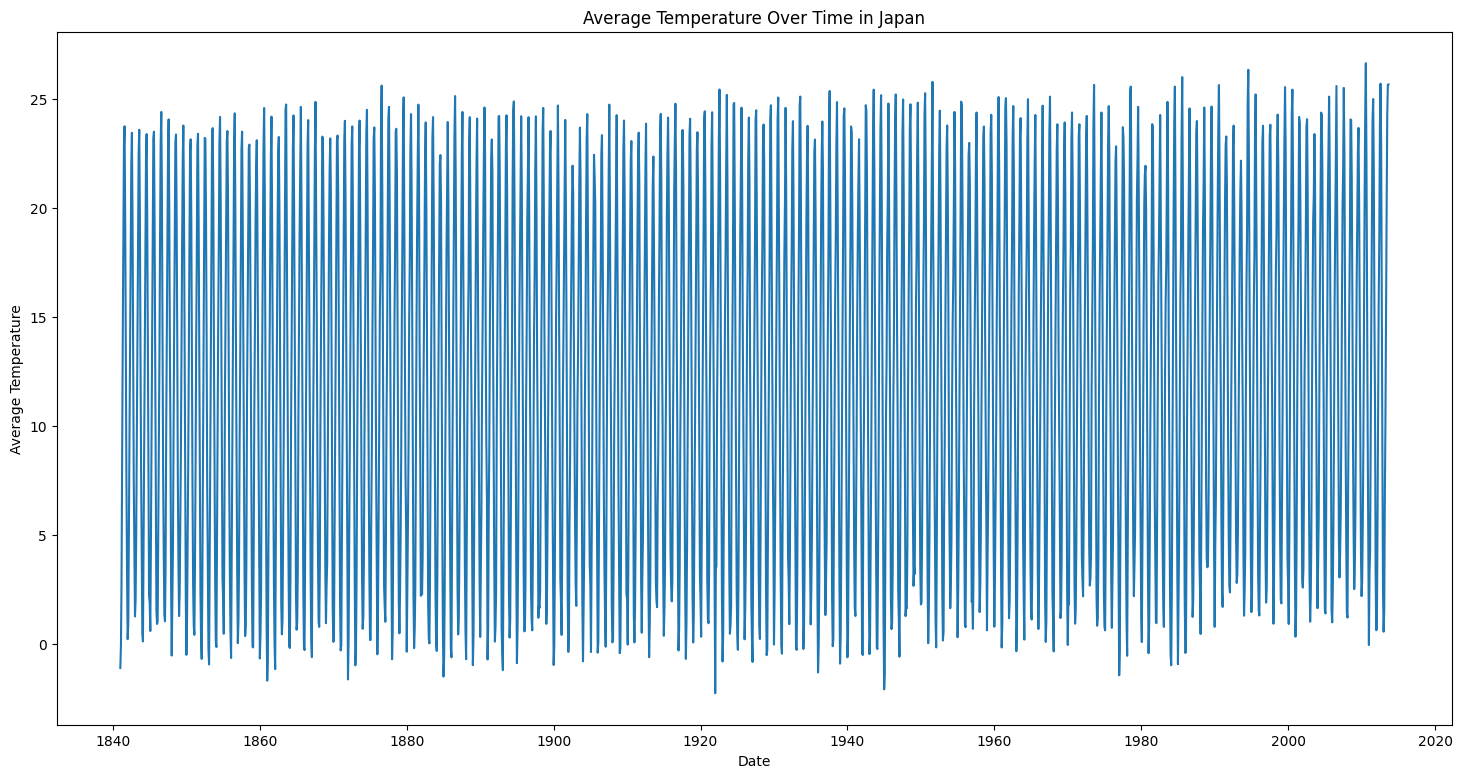

In [661]:
# Plot the data
plt.figure(figsize=(18, 9))
plt.plot(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time in Japan')
plt.show()

In [662]:
df.describe()

ds            y
count                           2073  2073.000000
mean   1927-05-02 12:28:49.667149056    11.958524
min              1841-01-01 00:00:00    -2.259000
25%              1884-03-01 00:00:00     3.953000
50%              1927-05-01 00:00:00    12.788000
75%              1970-07-01 00:00:00    19.527000
max              2013-09-01 00:00:00    26.642000
std                              NaN     8.192686

In [663]:
# Instantiate Prophet: create a new Prophet object.
m = Prophet()

In [664]:
# Fit the model
m.fit(df)

21:05:35 - cmdstanpy - INFO - Chain [1] start processing
21:05:35 - cmdstanpy - INFO - Chain [1] done processing


In [665]:
# Making predictions
# periods: specifies the number of days into the future.
future = m.make_future_dataframe(periods=10 * 12)

In [666]:
# Inspect Future Dataframe
future

ds
0    1841-01-01
1    1841-02-01
2    1841-03-01
3    1841-04-01
4    1841-05-01
...         ...
2188 2013-12-26
2189 2013-12-27
2190 2013-12-28
2191 2013-12-29
2192 2013-12-30

[2193 rows x 1 columns]

In [667]:
forecast = m.predict(future)

In [668]:
# Inspect Future Dataframe
future

ds
0    1841-01-01
1    1841-02-01
2    1841-03-01
3    1841-04-01
4    1841-05-01
...         ...
2188 2013-12-26
2189 2013-12-27
2190 2013-12-28
2191 2013-12-29
2192 2013-12-30

[2193 rows x 1 columns]

In [669]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1841-01-01  11.421479   -0.948936    1.308291    11.421479    11.421479   
1    1841-02-01  11.421943   -0.356288    1.827940    11.421943    11.421943   
2    1841-03-01  11.422362    2.814322    5.114807    11.422362    11.422362   
3    1841-04-01  11.422826    8.241443   10.669103    11.422826    11.422826   
4    1841-05-01  11.423275   12.822846   15.082822    11.423275    11.423275   
...         ...        ...         ...         ...          ...          ...   
2188 2013-12-26  13.088463    0.086310    2.495383    13.088463    13.088463   
2189 2013-12-27  13.088529    0.246164    2.420110    13.088529    13.088529   
2190 2013-12-28  13.088595    0.298683    2.617069    13.088595    13.088595   
2191 2013-12-29  13.088661    0.320953    2.622353    13.088661    13.088661   
2192 2013-12-30  13.088727    0.423658    2.723185    13.088727    13.088727   

      additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0         -11.282404            -11.282404            -11.282404 -11.282404   
1         -10.664907            -10.664907            -10.664907 -10.664907   
2          -7.465354             -7.465354             -7.465354  -7.465354   
3          -2.005241             -2.005241             -2.005241  -2.005241   
4           2.558043              2.558043              2.558043   2.558043   
...              ...                   ...                   ...        ...   
2188      -11.775668            -11.775668            -11.775668 -11.775668   
2189      -11.723257            -11.723257            -11.723257 -11.723257   
2190      -11.659959            -11.659959            -11.659959 -11.659959   
2191      -11.589077            -11.589077            -11.589077 -11.589077   
2192      -11.514042            -11.514042            -11.514042 -11.514042   

      yearly_lower  yearly_upper  multiplicative_terms  \
0       -11.282404    -11.282404                   0.0   
1       -10.664907    -10.664907                   0.0   
2        -7.465354     -7.465354                   0.0   
3        -2.005241     -2.005241                   0.0   
4         2.558043      2.558043                   0.0   
...            ...           ...                   ...   
2188    -11.775668    -11.775668                   0.0   
2189    -11.723257    -11.723257                   0.0   
2190    -11.659959    -11.659959                   0.0   
2191    -11.589077    -11.589077                   0.0   
2192    -11.514042    -11.514042                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                            0.0                         0.0   0.139075  
1                            0.0                         0.0   0.757036  
2                            0.0                         0.0   3.957008  
3                            0.0                         0.0   9.417585  
4                            0.0                         0.0  13.981318  
...                          ...                         ...        ...  
2188                         0.0                         0.0   1.312795  
2189                         0.0                         0.0   1.365272  
2190                         0.0                         0.0   1.428636  
2191                         0.0                         0.0   1.499584  
2192                         0.0                         0.0   1.574685  

[2193 rows x 16 columns]

In [670]:
# yhat: predicted values, yhat_lower: lower uncertainty interval, yhat_upper: upper uncertainty interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2188 2013-12-26  1.312795    0.086310    2.495383
2189 2013-12-27  1.365272    0.246164    2.420110
2190 2013-12-28  1.428636    0.298683    2.617069
2191 2013-12-29  1.499584    0.320953    2.622353
2192 2013-12-30  1.574685    0.423658    2.723185

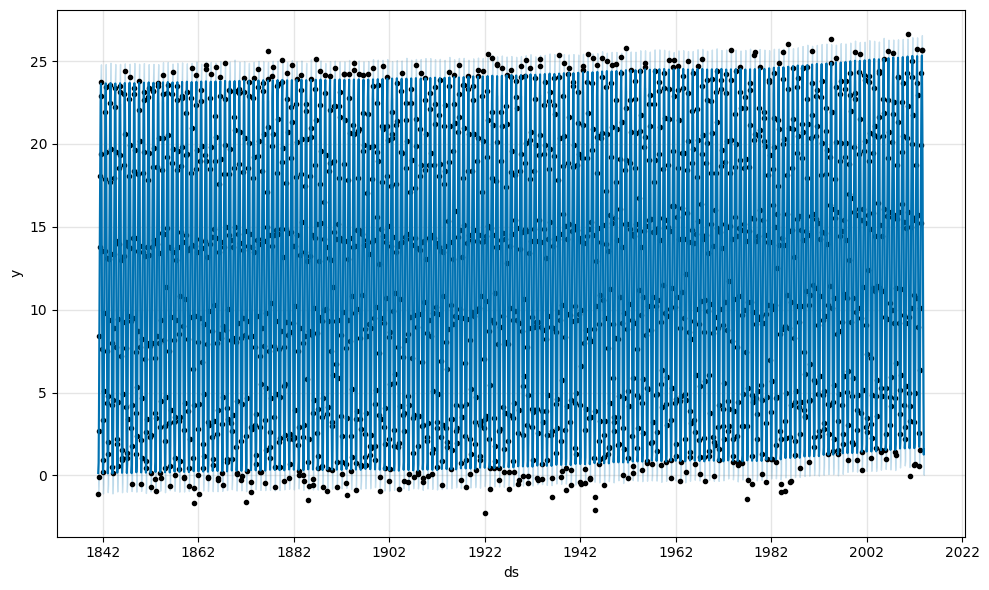

In [671]:
# Plot the forecast
fig1 = m.plot(forecast)

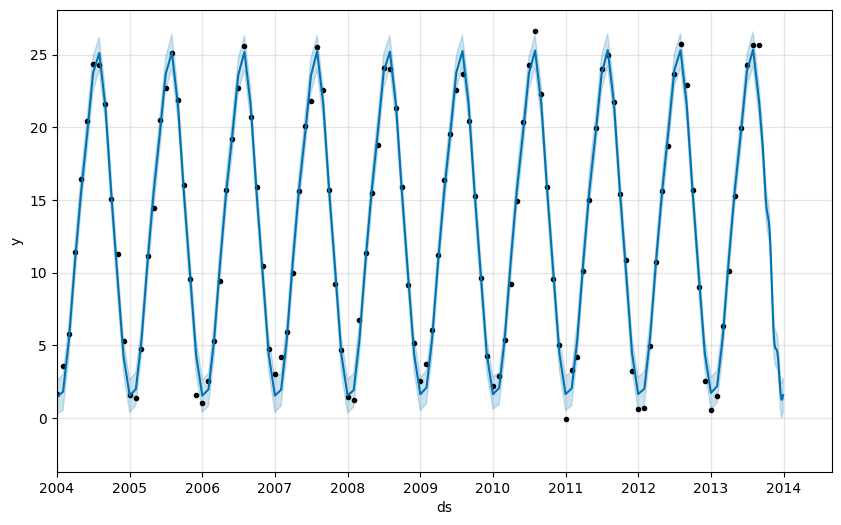

In [672]:
fig, ax = plt.subplots(figsize=(10, 6))
m.plot(forecast, ax=ax)
ax.set_xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2014-09-01'))
plt.show()

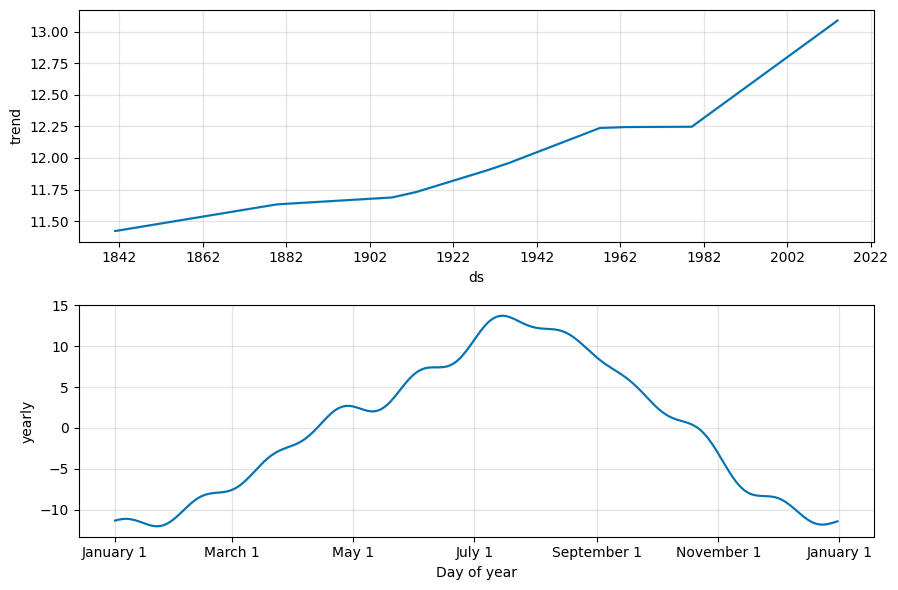

In [673]:
fig2 = m.plot_components(forecast)

In [674]:
# Interactive figure of the forecast 
plot_plotly(m, forecast)

In [675]:
# Interactive figure of the forecast components
plot_components_plotly(m, forecast)

#### Saturating Forecasts

In [676]:
# Set the carrying capacity to a specific value (e.g., 8.5)
df['cap'] = 25

In [677]:
df

ds       y  cap
0    1841-01-01  -1.100   25
1    1841-02-01  -0.079   25
2    1841-03-01   2.680   25
3    1841-04-01   8.400   25
4    1841-05-01  13.796   25
...         ...     ...  ...
2068 2013-05-01  15.256   25
2069 2013-06-01  19.961   25
2070 2013-07-01  24.286   25
2071 2013-08-01  25.669   25
2072 2013-09-01  25.669   25

[2073 rows x 3 columns]

In [678]:
# Specify logistic growth model
m = Prophet(growth='logistic')

# Fit the model
m.fit(df)

21:08:03 - cmdstanpy - INFO - Chain [1] start processing
21:08:03 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Create future dataframe with specified periods
future = m.make_future_dataframe(periods=1000)

# Specify constant capacity in the future
future['cap'] = 25

# Make predictions
fcst = m.predict(future)